In [4]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost tensorflow imbalanced-learn shap lime

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pickle
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import xgboost as xgb
import matplotlib.pyplot as plt 
import seaborn as sns  
import time
from scipy import stats
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss  
from sklearn.pipeline import make_pipeline 
from sklearn.svm import LinearSVC, SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform, uniform
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis, pearsonr
from pandas.plotting import scatter_matrix


In [7]:
pd.pandas.set_option('display.max_columns', None)
cirrhosis_data = pd.read_csv("dataset/cirrhosis.csv", index_col="ID")
cirrhosis_data.head()

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
ID                                                                           
1      400      D  D-penicillamine  21464   F       Y            Y       Y   
2     4500      C  D-penicillamine  20617   F       N            Y       Y   
3     1012      D  D-penicillamine  25594   M       N            N       N   
4     1925      D  D-penicillamine  19994   F       N            Y       Y   
5     1504     CL          Placebo  13918   F       N            Y       Y   

   Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
ID                                                                    
1      Y       14.5        261.0     2.60   156.0    1718.0  137.95   
2      N        1.1        302.0     4.14    54.0    7394.8  113.52   
3      S        1.4        176.0     3.48   210.0     516.0   96.10   
4      S        1.8        244.0     2.54    64.0    6121.8   60.63   
5      N        3.4        279.0     3.53   143.0     671.0  113.15   

    Tryglicerides  Platelets  Prothrombin  Stage  
ID                                                
1           172.0      190.0         12.2    4.0  
2            88.0      221.0         10.6    3.0  
3            55.0      151.0         12.0    4.0  
4            92.0      183.0         10.3    4.0  
5            72.0      136.0         10.9    3.0

In [8]:
cirrhosis_data.shape

(418, 19)

In [9]:
cirrhosis_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          

In [10]:
cirrhosis_data.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     41.250000    871.500000   80.600000      84.250000  188.500000   
50%     73.000000   1259.000000  114.700000     108.000000  251.000000   
75%    123.000000   1980.000000  151.900000     151.000000  318.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   416.000000  412.000000  
mean     10.731731    3.024272  
std       1.022000    0.882042  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

In [11]:
cirrhosis_data.describe(include="object")

Status             Drug  Sex Ascites Hepatomegaly Spiders Edema
count     418              312  418     312          312     312   418
unique      3                2    2       2            2       2     3
top         C  D-penicillamine    F       N            Y       N     N
freq      232              158  374     288          160     222   354

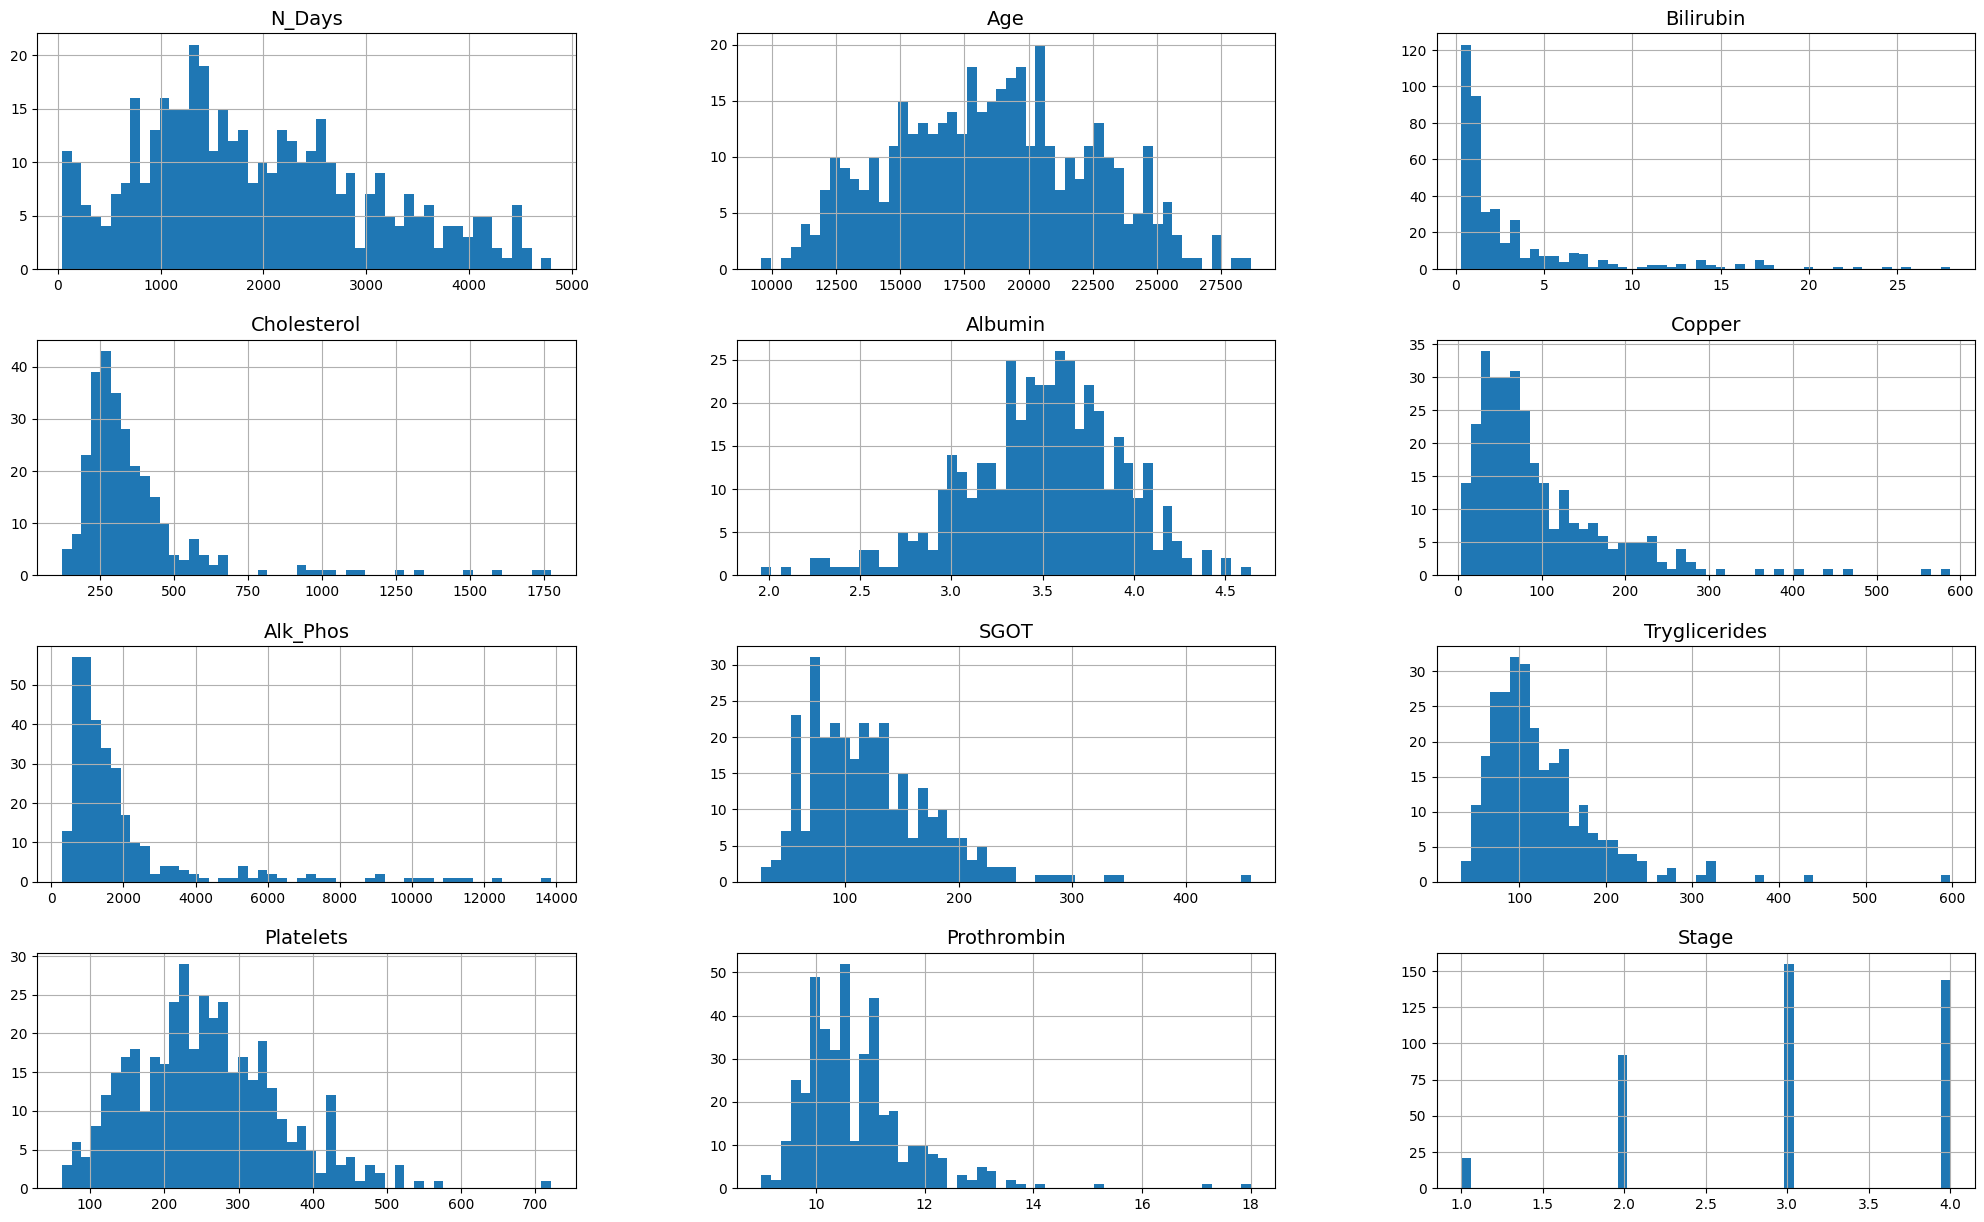

In [12]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cirrhosis_data.hist(bins = 50, figsize = (25, 15))
plt.show()

In [13]:
cirrhosis_data.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

# Assuming balanced_df is already loaded and preprocessed
X = balanced_df.drop('Stage', axis=1)
y = balanced_df['Stage']

# Split the data while preserving class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Rebuild train_set_stratified for correlation analysis
train_set_stratified = X_train.copy()
train_set_stratified['Stage'] = y_train


In [43]:
correlation_matrix = train_set_stratified.corr(numeric_only = True)
correlation_matrix

N_Days       Age  Bilirubin  Cholesterol   Albumin  \
N_Days            1.000000 -0.149965  -0.420886    -0.182626  0.473091   
Age              -0.149965  1.000000   0.073338    -0.071923 -0.081951   
Bilirubin        -0.420886  0.073338   1.000000     0.295050 -0.328711   
Cholesterol      -0.182626 -0.071923   0.295050     1.000000 -0.091089   
Albumin           0.473091 -0.081951  -0.328711    -0.091089  1.000000   
Copper           -0.327392  0.177630   0.455966     0.119044 -0.263787   
Alk_Phos          0.122983 -0.014602   0.106842     0.154457 -0.049387   
SGOT             -0.309292  0.002217   0.505598     0.268620 -0.323223   
Tryglicerides    -0.180943  0.050647   0.372520     0.240022 -0.175835   
Platelets         0.217215 -0.158075  -0.190704     0.109892  0.197284   
Prothrombin       0.063315  0.149489   0.196396    -0.108625 -0.032778   
Status_enc       -0.439598  0.201729   0.473582     0.215852 -0.263993   
Drug_enc          0.004734 -0.092164   0.131452    -0.083025 -0.008474   
Sex_enc           0.118568  0.147027   0.007972    -0.011107  0.057920   
Ascites_enc      -0.236372  0.158451   0.340064    -0.101582 -0.294061   
Hepatomegaly_enc -0.356211  0.080798   0.236262     0.198881 -0.231975   
Spiders_enc      -0.236686 -0.095773   0.204212     0.166783 -0.167719   
Edema_enc        -0.268724  0.193891   0.318352    -0.029675 -0.262458   
Stage            -0.418256  0.276726   0.263850     0.119697 -0.319426   

                    Copper  Alk_Phos      SGOT  Tryglicerides  Platelets  \
N_Days           -0.327392  0.122983 -0.309292      -0.180943   0.217215   
Age               0.177630 -0.014602  0.002217       0.050647  -0.158075   
Bilirubin         0.455966  0.106842  0.505598       0.372520  -0.190704   
Cholesterol       0.119044  0.154457  0.268620       0.240022   0.109892   
Albumin          -0.263787 -0.049387 -0.323223      -0.175835   0.197284   
Copper            1.000000  0.163063  0.422710       0.321770  -0.146295   
Alk_Phos          0.163063  1.000000  0.210659       0.145071   0.076138   
SGOT              0.422710  0.210659  1.000000       0.239279  -0.086245   
Tryglicerides     0.321770  0.145071  0.239279       1.000000  -0.045900   
Platelets        -0.146295  0.076138 -0.086245      -0.045900   1.000000   
Prothrombin       0.056568 -0.012120  0.033475      -0.040763  -0.096283   
Status_enc        0.385145  0.218773  0.351594       0.195453  -0.141442   
Drug_enc         -0.021924 -0.055379  0.066512      -0.015329  -0.073482   
Sex_enc           0.252819  0.139422  0.111060       0.019521  -0.052422   
Ascites_enc       0.296703 -0.009203  0.249286       0.250120  -0.264570   
Hepatomegaly_enc  0.258343  0.130219  0.203718       0.265374  -0.109674   
Spiders_enc       0.215540  0.035481  0.166982       0.142163  -0.166755   
Edema_enc         0.161672  0.050053  0.211963       0.159001  -0.216523   
Stage             0.299856  0.062589  0.250948       0.234435  -0.273798   

                  Prothrombin  Status_enc  Drug_enc   Sex_enc  Ascites_enc  \
N_Days               0.063315   -0.439598  0.004734  0.118568    -0.236372   
Age                  0.149489    0.201729 -0.092164  0.147027     0.158451   
Bilirubin            0.196396    0.473582  0.131452  0.007972     0.340064   
Cholesterol         -0.108625    0.215852 -0.083025 -0.011107    -0.101582   
Albumin             -0.032778   -0.263993 -0.008474  0.057920    -0.294061   
Copper               0.056568    0.385145 -0.021924  0.252819     0.296703   
Alk_Phos            -0.012120    0.218773 -0.055379  0.139422    -0.009203   
SGOT                 0.033475    0.351594  0.066512  0.111060     0.249286   
Tryglicerides       -0.040763    0.195453 -0.015329  0.019521     0.250120   
Platelets           -0.096283   -0.141442 -0.073482 -0.052422    -0.264570   
Prothrombin          1.000000    0.166568  0.192998  0.051977     0.140861   
Status_enc           0.166568    1.000000  0.047433  0.161116     0.193004   
Drug

<Axes: >

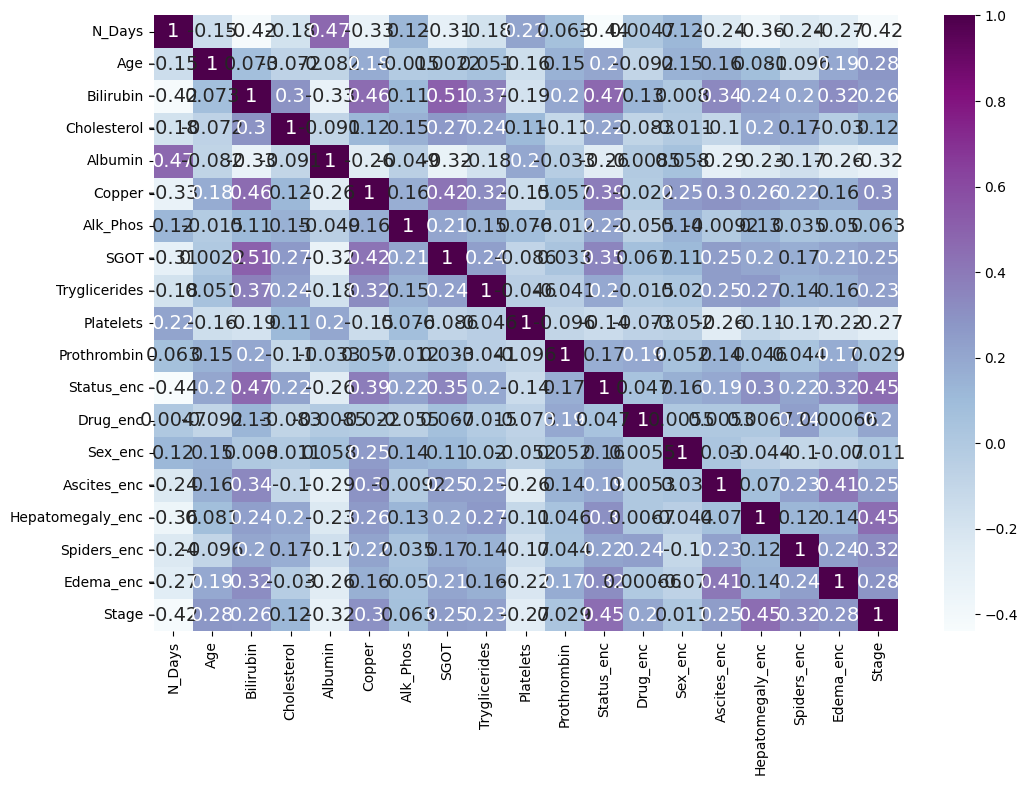

In [44]:
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, cmap = "BuPu", annot = True)

In [45]:
# of only the output label
correlation_matrix["Stage"].sort_values(ascending = False)

Stage               1.000000
Hepatomegaly_enc    0.454255
Status_enc          0.449812
Spiders_enc         0.322581
Copper              0.299856
Edema_enc           0.284901
Age                 0.276726
Bilirubin           0.263850
SGOT                0.250948
Ascites_enc         0.250708
Tryglicerides       0.234435
Drug_enc            0.202857
Cholesterol         0.119697
Alk_Phos            0.062589
Prothrombin         0.029133
Sex_enc             0.011223
Platelets          -0.273798
Albumin            -0.319426
N_Days             -0.418256
Name: Stage, dtype: float64

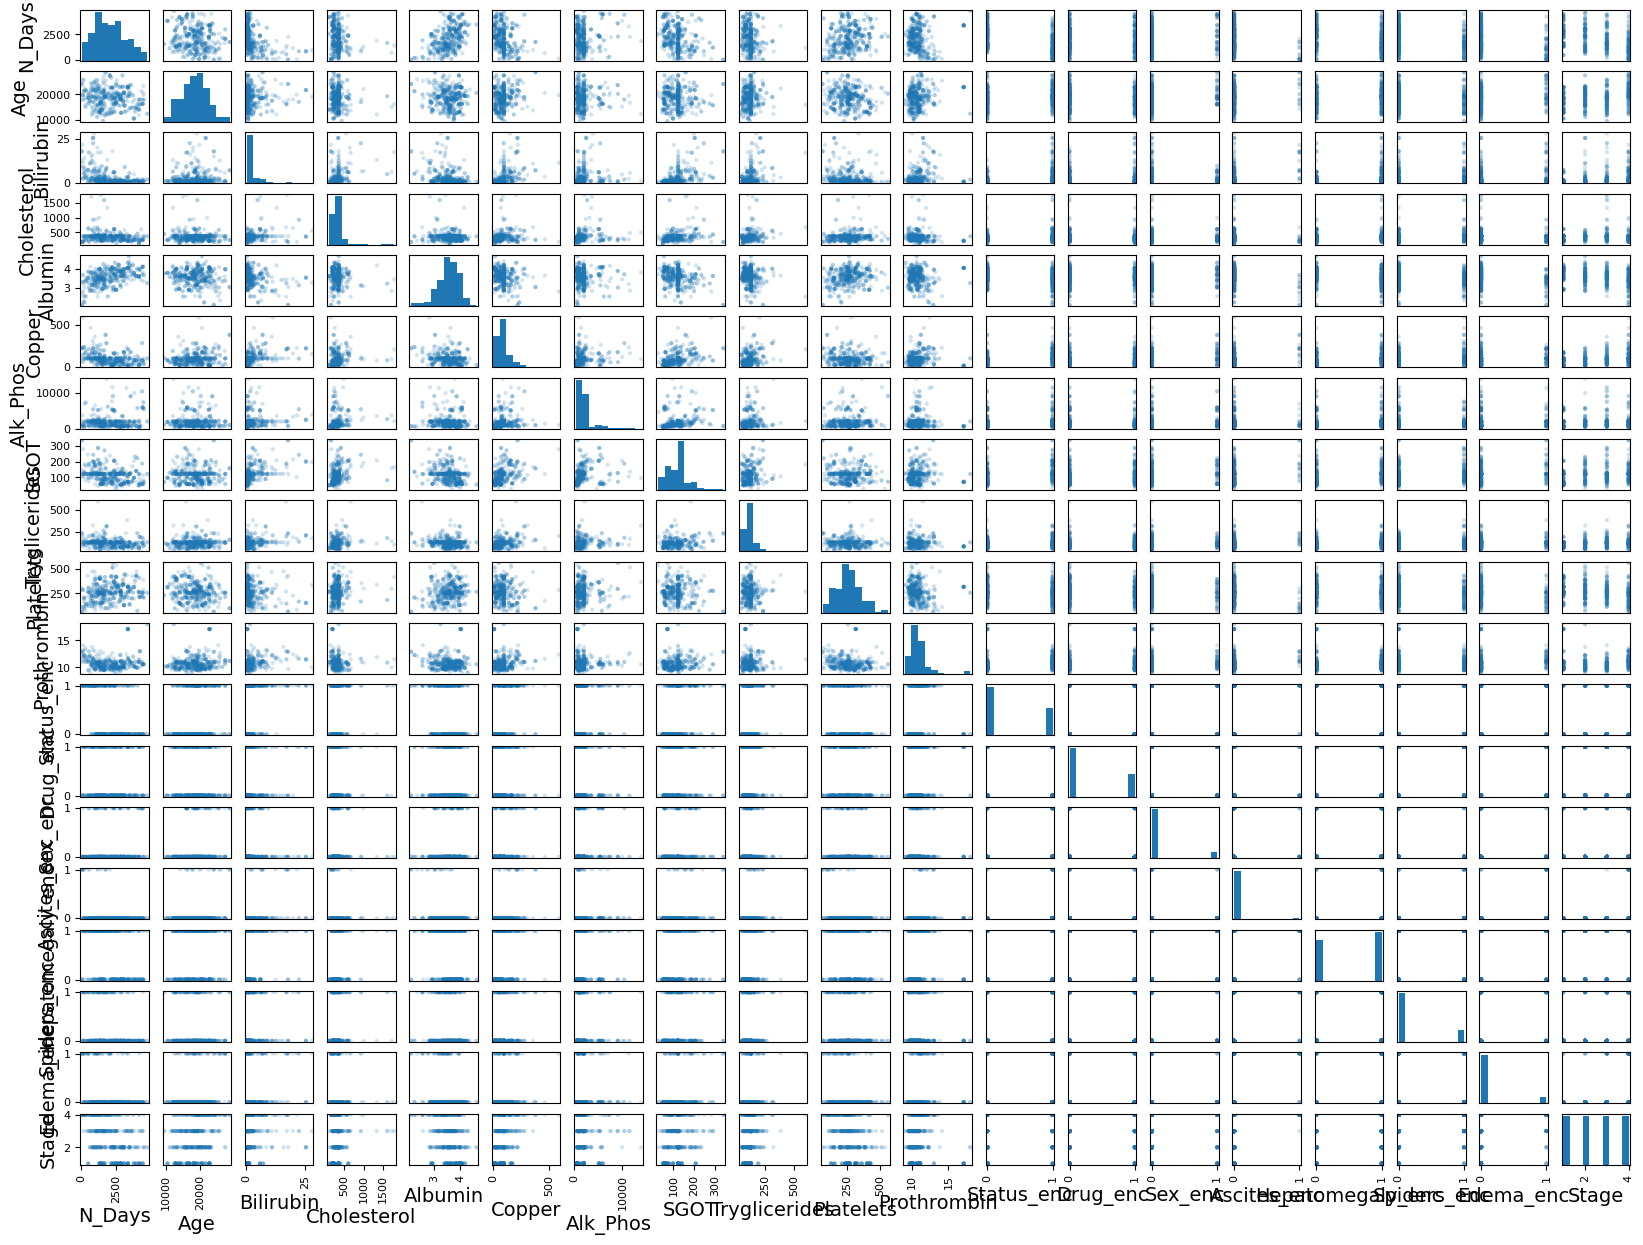

In [46]:
scatter_matrix(train_set_stratified, alpha = 0.2, figsize = (20, 15), diagonal = "hist")
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

<Axes: title={'center': 'Stage'}, xlabel='Stage'>

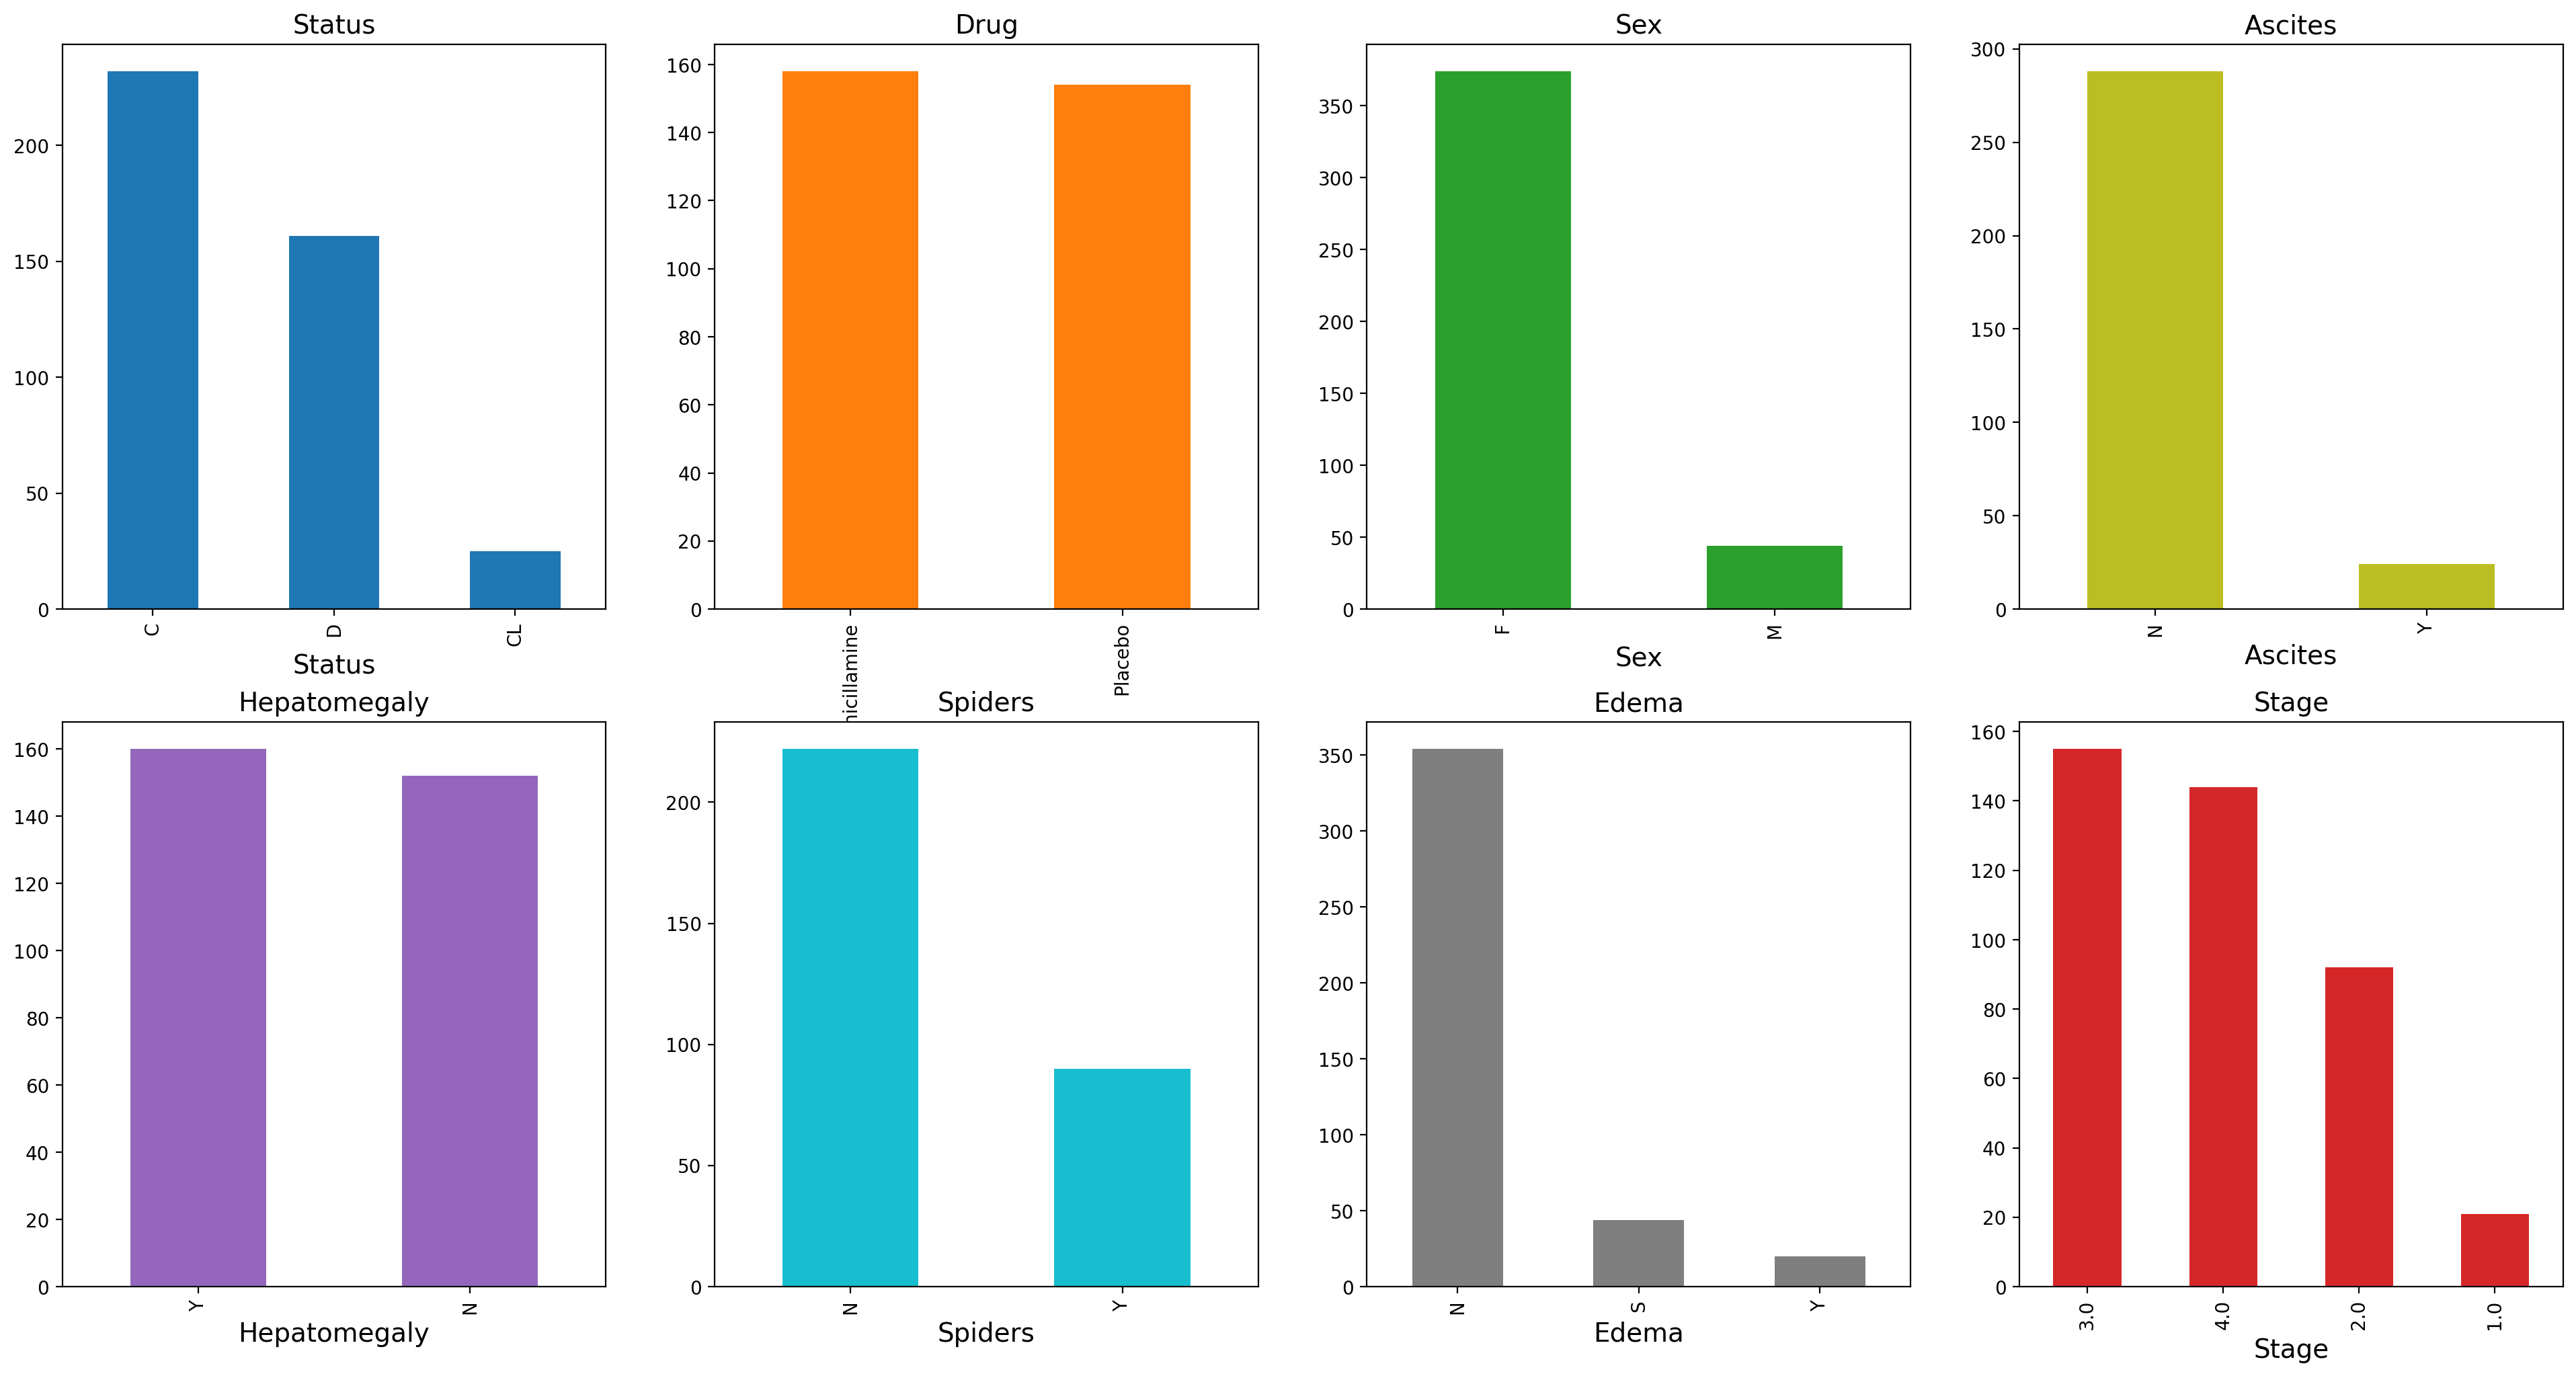

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=4, dpi=200, figsize=(24, 12))

cirrhosis_data.Status.value_counts().plot(kind='bar', color='tab:blue', title='Status', ax=axes[0,0])
cirrhosis_data.Drug.value_counts().plot(kind='bar', color='tab:orange', title='Drug', ax=axes[0,1])
cirrhosis_data.Sex.value_counts().plot(kind='bar', color='tab:green', title='Sex', ax=axes[0,2])
cirrhosis_data.Ascites.value_counts().plot(kind='bar', color='tab:olive', title='Ascites', ax=axes[0,3])
cirrhosis_data.Hepatomegaly.value_counts().plot(kind='bar', color='tab:purple', title='Hepatomegaly', ax=axes[1,0])
cirrhosis_data.Spiders.value_counts().plot(kind='bar', color='tab:cyan', title='Spiders', ax=axes[1,1])
cirrhosis_data.Edema.value_counts().plot(kind='bar', color='tab:grey', title='Edema', ax=axes[1,2])
cirrhosis_data.Stage.value_counts().plot(kind='bar', color='tab:red', title='Stage', ax=axes[1,3])

In [19]:
cirrhosis_data = cirrhosis_data.dropna(subset=['Stage'])

In [20]:
cirrhosis_data.isnull().sum()

N_Days             0
Status             0
Drug             100
Age                0
Sex                0
Ascites          100
Hepatomegaly     100
Spiders          100
Edema              0
Bilirubin          0
Cholesterol      128
Albumin            0
Copper           102
Alk_Phos         100
SGOT             100
Tryglicerides    130
Platelets         11
Prothrombin        2
Stage              0
dtype: int64

In [21]:
cirrhosis_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         412 non-null    int64  
 1   Status         412 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            412 non-null    int64  
 4   Sex            412 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          412 non-null    object 
 9   Bilirubin      412 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        412 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      401 non-null    float64
 17  Prothrombin    410 non-null    float64
 18  Stage          

In [22]:
numerical_features = [features for features in cirrhosis_data.columns if cirrhosis_data[features].dtypes != 'O']
categorical_features = [features for features in cirrhosis_data.columns if cirrhosis_data[features].dtypes == 'O']

In [23]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)

In [24]:
clean_data = cirrhosis_data.copy()
for i in numerical_features:
    values = cirrhosis_data[i].values.reshape(-1, 1)

    transformed_data = imputer.fit_transform(values)
    clean_data[i] = transformed_data

clean_data.isnull().sum()

N_Days             0
Status             0
Drug             100
Age                0
Sex                0
Ascites          100
Hepatomegaly     100
Spiders          100
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer
s_imputer = SimpleImputer(strategy="most_frequent")

In [26]:
for i in categorical_features:
    values = cirrhosis_data[i].values.reshape(-1,1)
    transformed_data = s_imputer.fit_transform(values)
    clean_data[i] = transformed_data.ravel()

In [27]:
clean_data.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [28]:
clean_data.head(10)

N_Days Status             Drug      Age Sex Ascites Hepatomegaly Spiders  \
ID                                                                             
1    400.0      D  D-penicillamine  21464.0   F       Y            Y       Y   
2   4500.0      C  D-penicillamine  20617.0   F       N            Y       Y   
3   1012.0      D  D-penicillamine  25594.0   M       N            N       N   
4   1925.0      D  D-penicillamine  19994.0   F       N            Y       Y   
5   1504.0     CL          Placebo  13918.0   F       N            Y       Y   
6   2503.0      D          Placebo  24201.0   F       N            Y       N   
7   1832.0      C          Placebo  20284.0   F       N            Y       N   
8   2466.0      D          Placebo  19379.0   F       N            N       N   
9   2400.0      D  D-penicillamine  15526.0   F       N            N       Y   
10    51.0      D          Placebo  25772.0   F       Y            N       Y   

   Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
ID                                                                    
1      Y       14.5        261.0     2.60   156.0    1718.0  137.95   
2      N        1.1        302.0     4.14    54.0    7394.8  113.52   
3      S        1.4        176.0     3.48   210.0     516.0   96.10   
4      S        1.8        244.0     2.54    64.0    6121.8   60.63   
5      N        3.4        279.0     3.53   143.0     671.0  113.15   
6      N        0.8        248.0     3.98    50.0     944.0   93.00   
7      N        1.0        322.0     4.09    52.0     824.0   60.45   
8      N        0.3        280.0     4.00    52.0    4651.2   28.38   
9      N        3.2        562.0     3.08    79.0    2276.0  144.15   
10     Y       12.6        200.0     2.74   140.0     918.0  147.25   

    Tryglicerides   Platelets  Prothrombin  Stage  
ID                                                 
1           172.0  190.000000         12.2    4.0  
2            88.0  221.000000         10.6    3.0  
3            55.0  151.000000         12.0    4.0  
4            92.0  183.000000         10.3    4.0  
5            72.0  136.000000         10.9    3.0  
6            63.0  256.102244         11.0    3.0  
7           213.0  204.000000          9.7    3.0  
8           189.0  373.000000         11.0    3.0  
9            88.0  251.000000         11.0    2.0  
10          143.0  302.000000         11.5    4.0

__here we have obtained the clean data i.e every null values have been removed (clean_data)__

In [29]:
clean_data.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [30]:
clean_data["Ascites"].values.reshape(-1, 1)

array([['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
      

In [31]:
le = LabelEncoder()
for i in categorical_features:
    # values = clean_data[i].values
    encoded = le.fit_transform(clean_data[i])
    clean_data[i+"_enc"] = encoded
    clean_data.drop([i], axis = 1, inplace=True)

In [32]:
clean_data.head(10)

N_Days      Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
ID                                                                       
1    400.0  21464.0       14.5        261.0     2.60   156.0    1718.0   
2   4500.0  20617.0        1.1        302.0     4.14    54.0    7394.8   
3   1012.0  25594.0        1.4        176.0     3.48   210.0     516.0   
4   1925.0  19994.0        1.8        244.0     2.54    64.0    6121.8   
5   1504.0  13918.0        3.4        279.0     3.53   143.0     671.0   
6   2503.0  24201.0        0.8        248.0     3.98    50.0     944.0   
7   1832.0  20284.0        1.0        322.0     4.09    52.0     824.0   
8   2466.0  19379.0        0.3        280.0     4.00    52.0    4651.2   
9   2400.0  15526.0        3.2        562.0     3.08    79.0    2276.0   
10    51.0  25772.0       12.6        200.0     2.74   140.0     918.0   

      SGOT  Tryglicerides   Platelets  Prothrombin  Stage  Status_enc  \
ID                                                                      
1   137.95          172.0  190.000000         12.2    4.0           2   
2   113.52           88.0  221.000000         10.6    3.0           0   
3    96.10           55.0  151.000000         12.0    4.0           2   
4    60.63           92.0  183.000000         10.3    4.0           2   
5   113.15           72.0  136.000000         10.9    3.0           1   
6    93.00           63.0  256.102244         11.0    3.0           2   
7    60.45          213.0  204.000000          9.7    3.0           0   
8    28.38          189.0  373.000000         11.0    3.0           2   
9   144.15           88.0  251.000000         11.0    2.0           2   
10  147.25          143.0  302.000000         11.5    4.0           2   

    Drug_enc  Sex_enc  Ascites_enc  Hepatomegaly_enc  Spiders_enc  Edema_enc  
ID                                                                            
1          0        0            1                 1            1          2  
2          0        0            0                 1            1          0  
3          0        1            0                 0            0          1  
4          0        0            0                 1            1          1  
5          1        0            0                 1            1          0  
6          1        0            0                 1            0          0  
7          1        0            0                 1            0          0  
8          1        0            0                 0            0          0  
9          0        0            0                 0            1          0  
10         1        0            1                 0            1          2

In [33]:
clean_data["Status_enc"].value_counts()
clean_data["Drug_enc"].value_counts()
clean_data["Sex_enc"].value_counts()
clean_data["Ascites_enc"].value_counts()
clean_data["Hepatomegaly_enc"].value_counts()
clean_data["Spiders_enc"].value_counts()
clean_data["Edema_enc"].value_counts()

Edema_enc
0    348
1     44
2     20
Name: count, dtype: int64

In [34]:
clean_data["Status_enc"].value_counts()

Status_enc
0    230
2    157
1     25
Name: count, dtype: int64

In [35]:
# All the patients in S category are also in Y category, that means both are having edema and in N category patients are not having edema 
clean_data['Edema_enc']= clean_data['Edema_enc'].replace({2: 1})

In [36]:
# All the patients in C category are still under observation, but under cases of Death (D) or liver transplant(CL) they are uncensored, so can be in same category
clean_data['Status_enc']= clean_data['Status_enc'].replace({2: 1})

In [37]:
clean_data.head()

N_Days      Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
ID                                                                       
1    400.0  21464.0       14.5        261.0     2.60   156.0    1718.0   
2   4500.0  20617.0        1.1        302.0     4.14    54.0    7394.8   
3   1012.0  25594.0        1.4        176.0     3.48   210.0     516.0   
4   1925.0  19994.0        1.8        244.0     2.54    64.0    6121.8   
5   1504.0  13918.0        3.4        279.0     3.53   143.0     671.0   

      SGOT  Tryglicerides  Platelets  Prothrombin  Stage  Status_enc  \
ID                                                                     
1   137.95          172.0      190.0         12.2    4.0           1   
2   113.52           88.0      221.0         10.6    3.0           0   
3    96.10           55.0      151.0         12.0    4.0           1   
4    60.63           92.0      183.0         10.3    4.0           1   
5   113.15           72.0      136.0         10.9    3.0           1   

    Drug_enc  Sex_enc  Ascites_enc  Hepatomegaly_enc  Spiders_enc  Edema_enc  
ID                                                                            
1          0        0            1                 1            1          1  
2          0        0            0                 1            1          0  
3          0        1            0                 0            0          1  
4          0        0            0                 1            1          1  
5          1        0            0                 1            1          0

In [38]:
val = clean_data["Stage"].value_counts()
perc = val/len(clean_data) * 100
perc

Stage
3.0    37.621359
4.0    34.951456
2.0    22.330097
1.0     5.097087
Name: count, dtype: float64

In [47]:
cat1 = clean_data[clean_data["Stage"] == 1]
cat2 = clean_data[clean_data["Stage"] == 2]
cat3 = clean_data[clean_data["Stage"] == 3]
cat4 = clean_data[clean_data["Stage"] == 4]

max_count =  max(cat1.shape[0], cat2.shape[0], cat3.shape[0], cat4.shape[0])

cat1_up = cat1.sample(n=max_count, replace=True)
cat2_up = cat2.sample(n=max_count, replace=True)
cat3_up = cat3.sample(n=max_count, replace=True)
cat4_up = cat4.sample(n=max_count, replace=True)

# Combine the upsampled categories back into a balanced DataFrame
balanced_df = pd.concat([cat1_up, cat2_up, cat3_up, cat4_up])


In [48]:
balanced_df.head(10)

N_Days      Age  Bilirubin  Cholesterol  Albumin      Copper  \
ID                                                                  
150  2891.0  12779.0        1.0   369.510563     3.63   57.000000   
352  2716.0  19358.0        0.6   369.510563     4.19   97.648387   
218  2170.0  12636.0        0.5   369.510563     3.89   29.000000   
98   3823.0  10550.0        1.0   239.000000     3.77   77.000000   
272  1525.0  14025.0        0.5   226.000000     2.93   22.000000   
52   2386.0  18460.0        6.0   614.000000     3.70  158.000000   
285  1401.0  16929.0        0.8   253.000000     3.48   65.000000   
153  2863.0  18118.0        0.5   217.000000     3.85   68.000000   
371   489.0  18628.0        7.3   369.510563     3.52   97.648387   
61   4256.0  16034.0        0.6   216.000000     3.94   28.000000   

        Alk_Phos        SGOT  Tryglicerides  Platelets  Prothrombin  Stage  \
ID                                                                           
150  1536.000000  134.850000     124.702128      233.0         10.0    1.0   
352  1982.655769  122.556346     124.702128      330.0          9.9    1.0   
218   897.000000   66.650000     124.702128      423.0         10.1    1.0   
98   1877.000000   97.650000     101.000000      312.0         10.2    1.0   
272   674.000000   58.000000      85.000000      153.0          9.8    1.0   
52   5084.400000  206.400000      93.000000      362.0         10.6    1.0   
285   688.000000   57.000000      80.000000      252.0         10.0    1.0   
153   453.000000   54.250000      68.000000      270.0         11.1    1.0   
371  1982.655769  122.556346     124.702128      265.0         11.1    1.0   
61    601.000000   60.450000     188.000000      211.0         13.0    1.0   

     Status_enc  Drug_enc  Sex_enc  Ascites_enc  Hepatomegaly_enc  \
ID                                                                  
150           0         1        0            0                 0   
352           0         0        0            0                 1   
218           0         0        0            0                 0   
98            0         0        0            0                 0   
272           0         0        0            0                 0   
52            1         0        1            0                 0   
285           0         0        0            0                 0   
153           0         0        0            0                 0   
371           1         0        0            0                 1   
61            0         1        1            0                 0   

     Spiders_enc  Edema_enc  
ID                           
150            1          0  
352            0          0  
218            0          0  
98             0          0  
272            0          0  
52             0          0  
285            0          0  
153            0          0  
371            0          1  
61             0          0

In [49]:
val = balanced_df["Stage"].value_counts()
perc = val/len(balanced_df) * 100
perc

Stage
1.0    25.0
2.0    25.0
3.0    25.0
4.0    25.0
Name: count, dtype: float64

In [50]:
balanced_df.shape

(620, 19)

In [51]:
balanced_df.to_csv('just_ml.csv', index=False)

In [52]:
X = balanced_df.drop('Stage', axis=1)
y = balanced_df['Stage']
X.shape, y.shape

((620, 18), (620,))

In [53]:
y.value_counts()

Stage
1.0    155
2.0    155
3.0    155
4.0    155
Name: count, dtype: int64

In [54]:
y_lalu = y 

In [55]:
y_lalu.value_counts()

Stage
1.0    155
2.0    155
3.0    155
4.0    155
Name: count, dtype: int64

In [56]:
y_lalu = y_lalu - 1
y_lalu

ID
150    0.0
352    0.0
218    0.0
98     0.0
272    0.0
      ... 
401    3.0
11     3.0
230    3.0
41     3.0
393    3.0
Name: Stage, Length: 620, dtype: float64

In [57]:
y_lalu.value_counts()

Stage
0.0    155
1.0    155
2.0    155
3.0    155
Name: count, dtype: int64

In [58]:
# Standardizing the data 
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std = pd.DataFrame(X_std, columns = X.columns)
X_std.head()

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
0  0.673279 -1.496444  -0.447686     0.092867  0.207424 -0.503704 -0.201605   
1  0.520900  0.251964  -0.551779     0.092867  1.557586  0.212787  0.063347   
2  0.045479 -1.534447  -0.577802     0.092867  0.834285 -0.997246 -0.580654   
3  1.484803 -2.088814  -0.447686    -0.684915  0.544965 -0.151173  0.000673   
4 -0.516145 -1.165312  -0.577802    -0.762389 -1.480278 -1.120632 -0.712935   

       SGOT  Tryglicerides  Platelets  Prothrombin  Status_enc  Drug_enc  \
0  0.459863       0.191289  -0.337947    -0.632490   -0.754732  1.527525   
1  0.181833       0.191289   0.746091    -0.715001   -0.754732 -0.654654   
2 -1.082530       0.191289   1.785427    -0.549980   -0.754732 -0.654654   
3 -0.381442      -0.334989   0.544929    -0.467470   -0.754732 -0.654654   
4 -1.278156      -0.690250  -1.232000    -0.797511   -0.754732 -0.654654   

    Sex_enc  Ascites_enc  Hepatomegaly_enc  Spiders_enc  Edema_enc  
0 -0.342224     -0.19628         -1.091244     2.307928  -0.373773  
1 -0.342224     -0.19628          0.916386    -0.433289  -0.373773  
2 -0.342224     -0.19628         -1.091244    -0.433289  -0.373773  
3 -0.342224     -0.19628         -1.091244    -0.433289  -0.373773  
4 -0.342224     -0.19628         -1.091244    -0.433289  -0.373773

In [59]:
# Split the data into train and test sets (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X_std, y_lalu, test_size=0.2, stratify=y, random_state=42)

# Display the sizes of the train and test sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))

Train set size: 496
Test set size: 124


In [60]:
X_train.shape, y_train.shape

((496, 18), (496,))

In [61]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_shape =  (18,), activation='relu'))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(25, activation='relu'))
    model.add(tf.keras.layers.Dense(4,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer= "adam", metrics=['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    history = model.fit(X_train, y_train, epochs = 1000, callbacks = [early_stop])



Epoch 1/1000


16/16 [==============================] - 1s 2ms/step - loss: 1.3786 - accuracy: 0.3367
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.2466 - accuracy: 0.5302
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.1368 - accuracy: 0.6008
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.0373 - accuracy: 0.6210
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.9451 - accuracy: 0.6472
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.8538 - accuracy: 0.6915
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.7822 - accuracy: 0.7278
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.7228 - accuracy: 0.7560
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.7802
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.

In [62]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 2.0351 - accuracy: 0.8548


[2.0350968837738037, 0.8548387289047241]

In [63]:
pred_prob = model.predict(X_test)
# pred_prob.round(2)
pred = pred_prob.argmax(axis = -1)
# pred 

4/4 [==============================] - 0s 2ms/step


In [64]:
train_time = 11
start = time.time()
pred_prob = model.predict(X_test)
pred = pred_prob.argmax(axis = -1)
end = time.time()
pred_speed = X_test.shape[0] / (end - start) 

train_percentage = model.evaluate(X_train, y_train)
test_percentage = model.evaluate(X_test, y_test)

conf_mat = confusion_matrix(y_test, pred)

4/4 [==============================] - 0s 2ms/step - loss: 2.0351 - accuracy: 0.8548


: The time and speed analysis of the Six-Layered NN algorithm : 
The training time of Six-Layered NN is: 11 sec
The prediction speed of the Six-Layered NN is: 1402 obs/sec
: The classifcation report of the Six-Layered NN algorithm : 
              precision    recall  f1-score   support

     Class 0       0.89      1.00      0.94        31
     Class 1       0.92      0.77      0.84        31
     Class 2       0.92      0.71      0.80        31
     Class 3       0.74      0.94      0.83        31

    accuracy                           0.85       124
   macro avg       0.87      0.85      0.85       124
weighted avg       0.87      0.85      0.85       124

Train Accuracy=100.0 %
Test Accuracy=85.48387289047241 %
: The confusion matrix of the Six-Layered NN algorithm : 


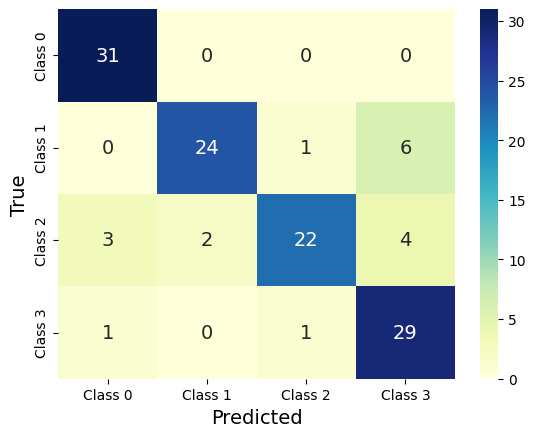

In [65]:
print(": The time and speed analysis of the Six-Layered NN algorithm : ")
print(f'The training time of Six-Layered NN is: {train_time} sec')
print(f'The prediction speed of the Six-Layered NN is: {round(pred_speed)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Six-Layered NN algorithm : ")

target_name = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

print(classification_report(y_test, pred, target_names=target_name, zero_division=1.0))
print(f"Train Accuracy={train_percentage[1] * 100} %")
print(f"Test Accuracy={test_percentage[1] * 100} %")
print("=========================================================")
print(": The confusion matrix of the Six-Layered NN algorithm : ")
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

__This is for regularization__

In [56]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_shape =  (18,), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.01))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.01))
    model.add(tf.keras.layers.Dense(25, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.01))
    model.add(tf.keras.layers.Dense(4,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer= "Nadam", metrics=['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    history = model.fit(X_train, y_train, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
16/16 [==============================] - 1s 2ms/step - loss: 1.3803 - accuracy: 0.3226
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2355 - accuracy: 0.4798
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1225 - accuracy: 0.5585
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0323 - accuracy: 0.5806
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.9545 - accuracy: 0.6210
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8883 - accuracy: 0.6552
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8374 - accuracy: 0.6794
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7798 - accuracy: 0.7198
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7270 - accuracy: 0.7238
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.7560

In [57]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.7960 - accuracy: 0.8629


[0.7959620952606201, 0.8629032373428345]

In [58]:
train_time = 9
start = time.time()
pred_prob = model.predict(X_test)
pred = pred_prob.argmax(axis = -1)
end = time.time()
pred_speed = X_test.shape[0] / (end - start) 

train_percentage = model.evaluate(X_train, y_train)
test_percentage = model.evaluate(X_test, y_test)

conf_mat = confusion_matrix(y_test, pred)

4/4 [==============================] - 0s 2ms/step - loss: 0.7960 - accuracy: 0.8629


: The time and speed analysis of the Six-Layered NN algorithm : 
The training time of Six-Layered NN is: 9 sec
The prediction speed of the Six-Layered NN is: 1140 obs/sec
: The classifcation report of the Six-Layered NN algorithm : 
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        31
     Class 1       0.86      0.81      0.83        31
     Class 2       0.86      0.81      0.83        31
     Class 3       0.74      0.84      0.79        31

    accuracy                           0.86       124
   macro avg       0.87      0.86      0.86       124
weighted avg       0.87      0.86      0.86       124

Train Accuracy=100.0 %
Test Accuracy=86.29032373428345 %
: The confusion matrix of the Six-Layered NN algorithm : 


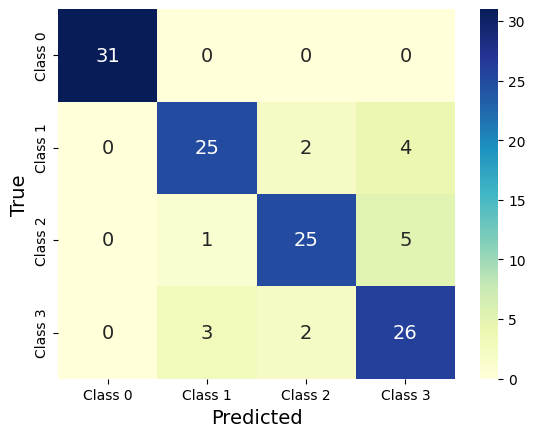

In [59]:
print(": The time and speed analysis of the Six-Layered NN algorithm : ")
print(f'The training time of Six-Layered NN is: {train_time} sec')
print(f'The prediction speed of the Six-Layered NN is: {round(pred_speed)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Six-Layered NN algorithm : ")

target_name = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

print(classification_report(y_test, pred, target_names=target_name, zero_division=1.0))
print(f"Train Accuracy={train_percentage[1] * 100} %")
print(f"Test Accuracy={test_percentage[1] * 100} %")
print("=========================================================")
print(": The confusion matrix of the Six-Layered NN algorithm : ")
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

__Less layers__

In [60]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, input_shape =  (18,), activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(4,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer= "adam", metrics=['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    history = model.fit(X_train, y_train, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
16/16 [==============================] - 1s 2ms/step - loss: 1.4316 - accuracy: 0.2883
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.3267 - accuracy: 0.3851
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.2541 - accuracy: 0.4456
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.1961 - accuracy: 0.4879
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.1500 - accuracy: 0.5444
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.1068 - accuracy: 0.5706
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.0709 - accuracy: 0.5786
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.0416 - accuracy: 0.5867
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.0134 - accuracy: 0.5927
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.9874 - accuracy: 0.6028

In [61]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 2.0617 - accuracy: 0.8710


[2.061655282974243, 0.8709677457809448]

In [62]:
train_time = 9
start = time.time()
pred_prob = model.predict(X_test)
pred = pred_prob.argmax(axis = -1)
end = time.time()
pred_speed = X_test.shape[0] / (end - start) 

train_percentage = model.evaluate(X_train, y_train)
test_percentage = model.evaluate(X_test, y_test)

conf_mat = confusion_matrix(y_test, pred)

4/4 [==============================] - 0s 2ms/step - loss: 2.0617 - accuracy: 0.8710


: The time and speed analysis of the Six-Layered NN algorithm : 
The training time of Six-Layered NN is: 9 sec
The prediction speed of the Six-Layered NN is: 1145 obs/sec
: The classifcation report of the Six-Layered NN algorithm : 
              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97        31
     Class 1       0.84      0.87      0.86        31
     Class 2       0.96      0.71      0.81        31
     Class 3       0.78      0.90      0.84        31

    accuracy                           0.87       124
   macro avg       0.88      0.87      0.87       124
weighted avg       0.88      0.87      0.87       124

Train Accuracy=100.0 %
Test Accuracy=87.09677457809448 %
: The confusion matrix of the Six-Layered NN algorithm : 


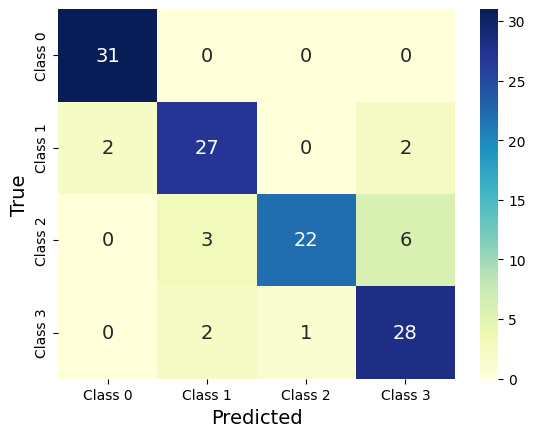

In [63]:
print(": The time and speed analysis of the Six-Layered NN algorithm : ")
print(f'The training time of Six-Layered NN is: {train_time} sec')
print(f'The prediction speed of the Six-Layered NN is: {round(pred_speed)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Six-Layered NN algorithm : ")

target_name = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

print(classification_report(y_test, pred, target_names=target_name, zero_division=1.0))
print(f"Train Accuracy={train_percentage[1] * 100} %")
print(f"Test Accuracy={test_percentage[1] * 100} %")
print("=========================================================")
print(": The confusion matrix of the Six-Layered NN algorithm : ")
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

__Now Dropout regularization__

In [64]:
    _model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, input_shape =  (18,), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.01))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.01))
    model.add(tf.keras.layers.Dense(4,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer= "adam", metrics=['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    history = model.fit(X_train, y_train, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
16/16 [==============================] - 2s 2ms/step - loss: 1.3886 - accuracy: 0.2540
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.2533 - accuracy: 0.4415
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 1.1328 - accuracy: 0.7077
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0094 - accuracy: 0.8750
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8834 - accuracy: 0.9980
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7502 - accuracy: 1.0000
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6127 - accuracy: 1.0000
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 1.0000
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 1.0000
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 1.0000

In [65]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.9623 - accuracy: 0.8790


[0.9623395800590515, 0.8790322542190552]

In [66]:
train_time = 9
start = time.time()
pred_prob = model.predict(X_test)
pred = pred_prob.argmax(axis = -1)
end = time.time()
pred_speed = X_test.shape[0] / (end - start) 

train_percentage = model.evaluate(X_train, y_train)
test_percentage = model.evaluate(X_test, y_test)

conf_mat = confusion_matrix(y_test, pred)

4/4 [==============================] - 0s 2ms/step - loss: 0.9623 - accuracy: 0.8790


: The time and speed analysis of the Six-Layered NN algorithm : 
The training time of Six-Layered NN is: 9 sec
The prediction speed of the Six-Layered NN is: 1095 obs/sec
: The classifcation report of the Six-Layered NN algorithm : 
              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97        31
     Class 1       0.87      0.87      0.87        31
     Class 2       0.96      0.74      0.84        31
     Class 3       0.78      0.90      0.84        31

    accuracy                           0.88       124
   macro avg       0.89      0.88      0.88       124
weighted avg       0.89      0.88      0.88       124

Train Accuracy=100.0 %
Test Accuracy=87.90322542190552 %
: The confusion matrix of the Six-Layered NN algorithm : 


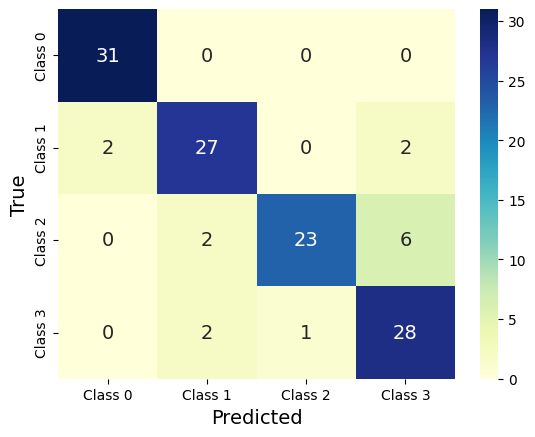

In [67]:
print(": The time and speed analysis of the Six-Layered NN algorithm : ")
print(f'The training time of Six-Layered NN is: {train_time} sec')
print(f'The prediction speed of the Six-Layered NN is: {round(pred_speed)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Six-Layered NN algorithm : ")

target_name = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

print(classification_report(y_test, pred, target_names=target_name, zero_division=1.0))
print(f"Train Accuracy={train_percentage[1] * 100} %")
print(f"Test Accuracy={test_percentage[1] * 100} %")
print("=========================================================")
print(": The confusion matrix of the Six-Layered NN algorithm : ")
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

__Now KNN classifier__

In [68]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [69]:
# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
X_test = np.array(X_test)

In [71]:
# Predict the labels for the test set
y_pred = knn.predict(X_test)

__Bagging and Boosting__

__XGBoost__

In [66]:
# Define the XGBoost classifier
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=4, reg_alpha = 2)

# Train the model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=4, ...)

In [67]:
predictions_train = model_xgb.predict(X_train)
train_percentage = model_xgb.score(X_train, y_train)

start1 = time.time()
predictions_test = model_xgb.predict(X_test)
end1 = time.time()
boost_time_pred = X_test.shape[0] / 1

test_percentage = model_xgb.score(X_test, y_test)

# boost_time_train = end - start 

: The time and speed analysis of the XGboost algorithm : 
The training time of XGboost is: 1 sec
The prediction speed of the XGboost is: 124 obs/sec
: The classifcation report of the XGboost algorithm : 
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        31
         1.0       0.77      0.74      0.75        31
         2.0       0.79      0.71      0.75        31
         3.0       0.90      0.90      0.90        31

    accuracy                           0.84       124
   macro avg       0.84      0.84      0.84       124
weighted avg       0.84      0.84      0.84       124

Train Accuracy=99.79838709677419 %
Test Accuracy=83.87096774193549 %
: The confusion matrix of the XGboost algorithm : 


<Axes: >

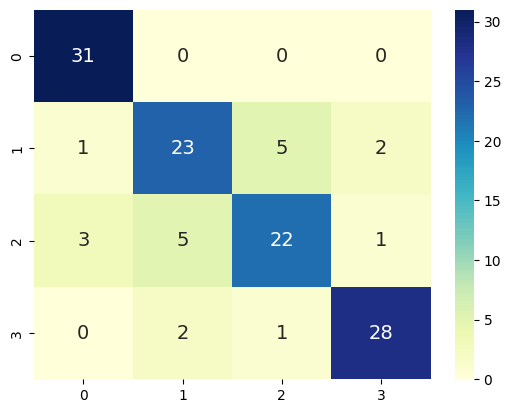

In [68]:
print(": The time and speed analysis of the XGboost algorithm : ")
print(f'The training time of XGboost is: {1} sec')
print(f'The prediction speed of the XGboost is: {round(boost_time_pred)} obs/sec')
print("=========================================================")
print(": The classifcation report of the XGboost algorithm : ")
print(classification_report(y_test, predictions_test))
print(f"Train Accuracy={train_percentage*100} %")
print(f"Test Accuracy={test_percentage*100} %")
print("=========================================================")
print(": The confusion matrix of the XGboost algorithm : ")
conf_mat = confusion_matrix(y_test, predictions_test)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd')

__Ada Boost__

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
# Define the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=1500, random_state=42)

# Train the model
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1500, random_state=42)

In [77]:
predictions_train = model.predict(X_train)
train_percentage = model.score(X_train,y_train)

start1 = time.time()
predictions_test = model.predict(X_test)
end1 = time.time()
boost_time_pred = X_test.shape[0] / 1

test_percentage = model.score(X_test, y_test)

# boost_time_train = end - start 

: The time and speed analysis of the AdaBoost algorithm : 
The training time of AdaBoost is: 1 sec
The prediction speed of the AdaBoost is: 124 obs/sec
: The classifcation report of the AdaBoost algorithm : 
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        31
         1.0       0.64      0.58      0.61        31
         2.0       0.63      0.55      0.59        31
         3.0       0.65      0.71      0.68        31

    accuracy                           0.71       124
   macro avg       0.70      0.71      0.70       124
weighted avg       0.70      0.71      0.70       124

Train Accuracy=78.0241935483871 %
Test Accuracy=70.96774193548387 %
: The confusion matrix of the AdaBoost algorithm : 


<Axes: >

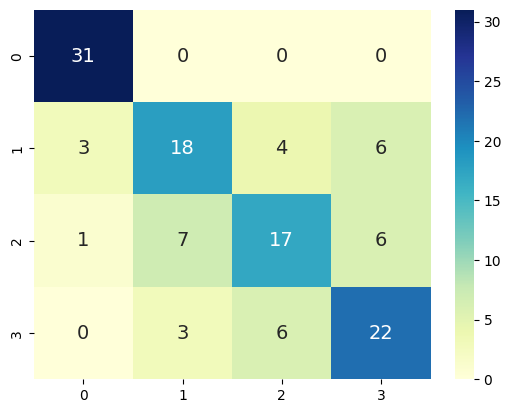

In [78]:
print(": The time and speed analysis of the AdaBoost algorithm : ")
print(f'The training time of AdaBoost is: {1} sec')
print(f'The prediction speed of the AdaBoost is: {round(boost_time_pred)} obs/sec')
print("=========================================================")
print(": The classifcation report of the AdaBoost algorithm : ")
print(classification_report(y_test, predictions_test))
print(f"Train Accuracy={train_percentage*100} %")
print(f"Test Accuracy={test_percentage*100} %")
print("=========================================================")
print(": The confusion matrix of the AdaBoost algorithm : ")
conf_mat = confusion_matrix(y_test, predictions_test)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd')

__Gradient Boost__

__Histogram Based Gradient Boosting__

__SVM__

__Linear SVM__

In [79]:
linear_clf = SVC(kernel='linear', decision_function_shape='ovr', C = 5)

# Fit the classifier to the training data
start = time.time()
linear_clf.fit(X_train, y_train)
end = time.time()

time = end - start
lin_svm_time_train = time

In [80]:
import time

In [81]:
start1 = time.time()
y_pred = linear_clf.predict(X_test)
end1 = time.time()

time1 = end1 - start1 

lin_svm_time_pred = X_test.shape[0] / time1

In [82]:
train = linear_clf.score(X_train, y_train)
test = linear_clf.score(X_test, y_test)

: The time and speed analysis of the Linear SVM algorithm : 
The training time of Linear SVM is: 0.059389591217041016 sec
The prediction speed of the Linear SVM is: 61615 obs/sec
: The classifcation report of the Linear SVM algorithm : 
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70        31
         1.0       0.35      0.29      0.32        31
         2.0       0.37      0.48      0.42        31
         3.0       0.54      0.48      0.51        31

    accuracy                           0.48       124
   macro avg       0.49      0.48      0.49       124
weighted avg       0.49      0.48      0.49       124

The training Accuracy: 0.6290322580645161 The test set Accuracy: 0.4838709677419355
: The confusion matrix of teh Linear SVM algorithm : 


<Axes: >

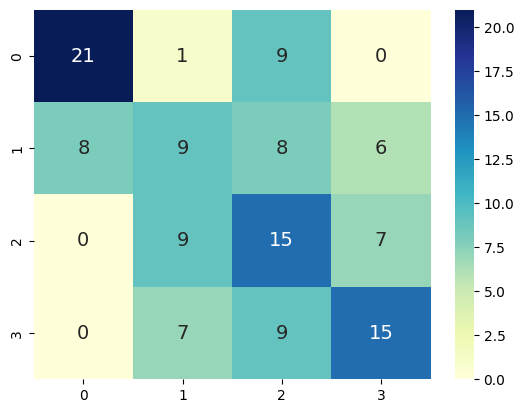

In [83]:
print(": The time and speed analysis of the Linear SVM algorithm : ")
print(f'The training time of Linear SVM is: {lin_svm_time_train} sec')
print(f'The prediction speed of the Linear SVM is: {round(lin_svm_time_pred)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Linear SVM algorithm : ")
print(classification_report(y_test, y_pred))
print(f"The training Accuracy: {train} The test set Accuracy: {test}")
print("=========================================================")
print(": The confusion matrix of teh Linear SVM algorithm : ")
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd')

__Gaussian SVM__

In [84]:
fine_gamma = np.sqrt(18)/4
medium_gamma = np.sqrt(18)
coarse_gamma = np.sqrt(18)*4

print(f'Gamma of fine gaussian SVM: {fine_gamma}, Gamma of medium gaussian SVM: {medium_gamma}, Gamma of coarse gaussian SVM: {coarse_gamma}')

Gamma of fine gaussian SVM: 1.0606601717798212, Gamma of medium gaussian SVM: 4.242640687119285, Gamma of coarse gaussian SVM: 16.97056274847714


In [85]:
fine_gauss_clf = SVC(kernel = "rbf", gamma = fine_gamma, decision_function_shape='ovr', C = 0.1)
# Fit the classifier to the training data
start = time.time()
fine_gauss_clf.fit(X_train, y_train)
end = time.time()

time = end - start
fine_gauss_time_train = time

In [86]:
import time
start1 = time.time()
y_pred = fine_gauss_clf.predict(X_test)
end1 = time.time()

time1 = end1 - start1 

fine_gauss_time_pred = X_test.shape[0] / time1

In [87]:
train = fine_gauss_clf.score(X_train, y_train)
test = fine_gauss_clf.score(X_test, y_test)

: The time and speed analysis of the Fine Gauss SVM algorithm : 
The training time of Fine Gauss SVM is: 0.01107025146484375 sec
The prediction speed of the Fine Gauss SVM is: 24809 obs/sec
: The classifcation report of the Fine Gauss SVM algorithm : 
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81        31
         1.0       0.80      0.77      0.79        31
         2.0       0.56      0.97      0.71        31
         3.0       1.00      0.61      0.76        31

    accuracy                           0.76       124
   macro avg       0.84      0.76      0.77       124
weighted avg       0.84      0.76      0.77       124

The training Accuracy: 0.9516129032258065 The test set Accuracy: 0.7580645161290323
: The confusion matrix of the Fine Gauss SVM algorithm : 


<Axes: >

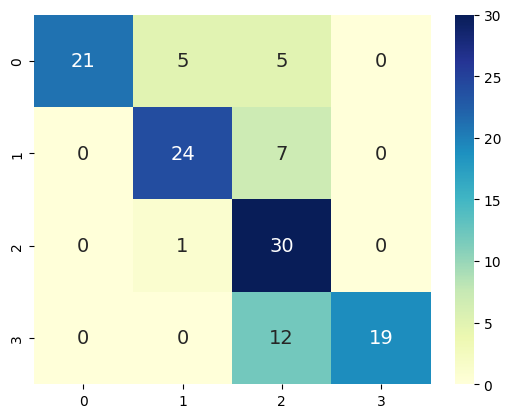

In [88]:
print(": The time and speed analysis of the Fine Gauss SVM algorithm : ")
print(f'The training time of Fine Gauss SVM is: {fine_gauss_time_train} sec')
print(f'The prediction speed of the Fine Gauss SVM is: {round(fine_gauss_time_pred)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Fine Gauss SVM algorithm : ")
print(classification_report(y_test, y_pred))
print(f"The training Accuracy: {train} The test set Accuracy: {test}")
print("=========================================================")
print(": The confusion matrix of the Fine Gauss SVM algorithm : ")
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd')

__Medium Gauss__

In [89]:
medium_gauss_clf = SVC(kernel = "rbf", gamma = medium_gamma, decision_function_shape='ovr', C = 0.1)
# Fit the classifier to the training data
start = time.time()
medium_gauss_clf.fit(X_train, y_train)
end = time.time()

time = end - start
medium_gauss_time_train = time

In [90]:
import time
start1 = time.time()
y_pred = medium_gauss_clf.predict(X_test)
end1 = time.time()

time1 = end1 - start1 

medium_gauss_time_pred = X_test.shape[0] / time1

In [91]:
train = medium_gauss_clf.score(X_train, y_train)
test = medium_gauss_clf.score(X_test, y_test)

: The time and speed analysis of the Medium Gauss SVM algorithm : 
The training time of Medium Gauss SVM is: 0.011523246765136719 sec
The prediction speed of the Medium Gauss SVM is: 27375 obs/sec
: The classifcation report of the Medium Gauss SVM algorithm : 
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        31
         1.0       0.81      0.81      0.81        31
         2.0       0.61      0.97      0.75        31
         3.0       1.00      0.65      0.78        31

    accuracy                           0.80       124
   macro avg       0.85      0.80      0.80       124
weighted avg       0.85      0.80      0.80       124

The training Accuracy: 0.9838709677419355 The test set Accuracy: 0.7983870967741935
: The confusion matrix of the Medium Gauss SVM algorithm : 


<Axes: >

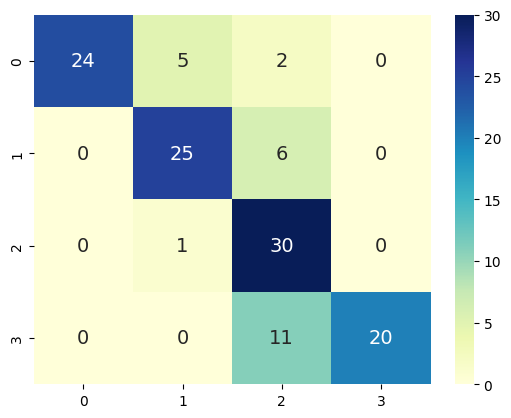

In [92]:
print(": The time and speed analysis of the Medium Gauss SVM algorithm : ")
print(f'The training time of Medium Gauss SVM is: {medium_gauss_time_train} sec')
print(f'The prediction speed of the Medium Gauss SVM is: {round(medium_gauss_time_pred)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Medium Gauss SVM algorithm : ")
print(classification_report(y_test, y_pred))
print(f"The training Accuracy: {train} The test set Accuracy: {test}")
print("=========================================================")
print(": The confusion matrix of the Medium Gauss SVM algorithm : ")
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd')

__Coarse Gauss__

In [93]:
coarse_gauss_clf = SVC(kernel = "rbf", gamma = coarse_gamma, decision_function_shape='ovr', C = 0.1)
# Fit the classifier to the training data
start = time.time()
coarse_gauss_clf.fit(X_train, y_train)
end = time.time()

time = end - start
coarse_gauss_time_train = time

In [94]:
import time
start1 = time.time()
y_pred = coarse_gauss_clf.predict(X_test)
end1 = time.time()

time1 = end1 - start1 

coarse_gauss_time_pred = X_test.shape[0] / time1

In [95]:
train = coarse_gauss_clf.score(X_train, y_train)
test = coarse_gauss_clf.score(X_test, y_test)

: The time and speed analysis of the Coarse Gauss SVM algorithm : 
The training time of Coarse Gauss SVM is: 0.015271902084350586 sec
The prediction speed of the Coarse Gauss SVM is: 28400 obs/sec
: The classifcation report of the Coarse Gauss SVM algorithm : 
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        31
         1.0       0.81      0.81      0.81        31
         2.0       0.61      0.97      0.75        31
         3.0       1.00      0.65      0.78        31

    accuracy                           0.80       124
   macro avg       0.85      0.80      0.80       124
weighted avg       0.85      0.80      0.80       124

The training Accuracy: 0.9838709677419355 The test set Accuracy: 0.7983870967741935
: The confusion matrix of the Coarse Gauss SVM algorithm : 


<Axes: >

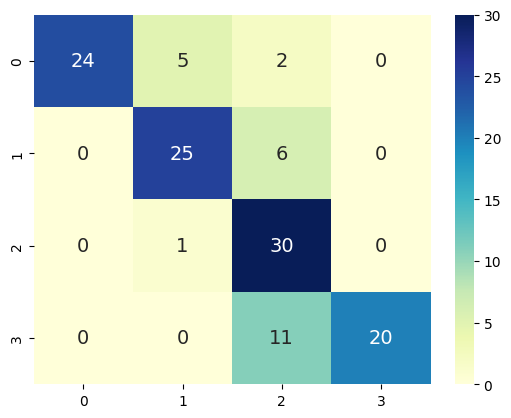

In [96]:
print(": The time and speed analysis of the Coarse Gauss SVM algorithm : ")
print(f'The training time of Coarse Gauss SVM is: {coarse_gauss_time_train} sec')
print(f'The prediction speed of the Coarse Gauss SVM is: {round(coarse_gauss_time_pred)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Coarse Gauss SVM algorithm : ")
print(classification_report(y_test, y_pred))
print(f"The training Accuracy: {train} The test set Accuracy: {test}")
print("=========================================================")
print(": The confusion matrix of the Coarse Gauss SVM algorithm : ")
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd')

__Decision Trees__

__Naive Byes__

In [97]:
from sklearn.naive_bayes import MultinomialNB

In [98]:
# do min max scaling only positive values will be there in naive byes
# Standardizing the data 
scaler2 = MinMaxScaler()
X_norm = scaler2.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns = X.columns)
X_norm.head()

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
0  0.625028  0.418122   0.007937     0.054612  0.723140  0.115523  0.010552   
1  0.592470  0.486630   0.011905     0.147154  0.863636  0.169040  0.123421   
2  0.875083  0.228398   0.035714     0.078277  0.619835  0.126354  0.030548   
3  0.490365  0.668066   0.011905     0.052184  0.814050  0.014440  0.368200   
4  0.328682  0.191989   0.007937     0.060073  0.342975  0.032491  0.026859   

       SGOT  Tryglicerides  Platelets  Prothrombin  Status_enc  Drug_enc  \
0  0.029851       0.043321   0.415170     0.259259         0.0       0.0   
1  0.194286       0.145672   0.534930     0.111111         0.0       0.0   
2  0.238806       0.115523   0.734531     0.123457         0.0       0.0   
3  0.037313       0.043321   0.355289     0.246914         0.0       0.0   
4  0.038878       0.074007   0.181637     0.098765         0.0       0.0   

   Sex_enc  Ascites_enc  Hepatomegaly_enc  Spiders_enc  Edema_enc  
0      0.0          0.0               0.0          0.0        0.0  
1      0.0          0.0               1.0          0.0        0.0  
2      0.0          0.0               0.0          0.0        0.0  
3      0.0          0.0               0.0          0.0        0.0  
4      0.0          0.0               0.0          0.0        0.0

In [99]:
# Split the data into train and test sets (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_lalu, test_size=0.2, stratify=y, random_state=42)

# Display the sizes of the train and test sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))

Train set size: 496
Test set size: 124


In [100]:
# Create the Naive Bayes classifier
nb = MultinomialNB(alpha=16)

# Fit the classifier to the training data
nb.fit(X_train, y_train)

MultinomialNB(alpha=16)

In [101]:
import time
start1 = time.time()
y_pred = nb.predict(X_test)
end1 = time.time()

time1 = end1 - start1 

nb_time_pred = X_test.shape[0] / 1

In [102]:
train = nb.score(X_train, y_train)
test = nb.score(X_test, y_test)

: The time and speed analysis of the NB algorithm : 
The training time of NB is: 1 sec
The prediction speed of the NB is: 124 obs/sec
: The classifcation report of the NB algorithm : 
              precision    recall  f1-score   support

         0.0       0.47      0.61      0.54        31
         1.0       0.13      0.10      0.11        31
         2.0       0.34      0.39      0.36        31
         3.0       0.50      0.42      0.46        31

    accuracy                           0.38       124
   macro avg       0.36      0.38      0.37       124
weighted avg       0.36      0.38      0.37       124

The training Accuracy: 0.4576612903225806 The test set Accuracy: 0.3790322580645161
: The confusion matrix of the NB algorithm : 


<Axes: >

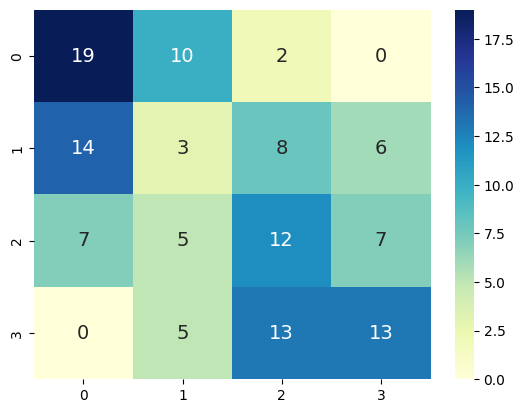

In [103]:
print(": The time and speed analysis of the NB algorithm : ")
print(f'The training time of NB is: {1} sec')
print(f'The prediction speed of the NB is: {round(nb_time_pred)} obs/sec')
print("=========================================================")
print(": The classifcation report of the NB algorithm : ")
print(classification_report(y_test, y_pred))
print(f"The training Accuracy: {train} The test set Accuracy: {test}")
print("=========================================================")
print(": The confusion matrix of the NB algorithm : ")
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd')

In [104]:
results_data = {
    'Model': [],
    'Train_Accuracy (%)': [],
    'Test_Accuracy (%)': [],
    'Training_Time (s)': [],
    'Prediction_Speed (obs/sec)': []
}
results_data['Model'].append('NN_100_50_25')
results_data['Train_Accuracy (%)'].append(100.0)  
results_data['Test_Accuracy (%)'].append(89.51)
results_data['Training_Time (s)'].append(11)  
results_data['Prediction_Speed (obs/sec)'].append(1459)  

results_data['Model'].append('NN_100_50_25_Dropout')
results_data['Train_Accuracy (%)'].append(99.79) 
results_data['Test_Accuracy (%)'].append(87.09)
results_data['Training_Time (s)'].append(9)  
results_data['Prediction_Speed (obs/sec)'].append(1137)  

results_data['Model'].append('NN_32_16')
results_data['Train_Accuracy (%)'].append(100.0)  
results_data['Test_Accuracy (%)'].append(83.064)
results_data['Training_Time (s)'].append(9)  
results_data['Prediction_Speed (obs/sec)'].append(911)  

results_data['Model'].append('NN_32_16_Dropout')
results_data['Train_Accuracy (%)'].append(97.37)  
results_data['Test_Accuracy (%)'].append(87.90)
results_data['Training_Time (s)'].append(9)  
results_data['Prediction_Speed (obs/sec)'].append(1208)  

results_data['Model'].append('XGBoost')
results_data['Train_Accuracy (%)'].append(99.39)
results_data['Test_Accuracy (%)'].append(85.48)
results_data['Training_Time (s)'].append(1) 
results_data['Prediction_Speed (obs/sec)'].append(124) 

results_data['Model'].append('AdaBoost')
results_data['Train_Accuracy (%)'].append(76.20)
results_data['Test_Accuracy (%)'].append(74.19)
results_data['Training_Time (s)'].append(1)  
results_data['Prediction_Speed (obs/sec)'].append(124) 

results_data['Model'].append('Linear_SVM')
results_data['Train_Accuracy (%)'].append(60.48)  
results_data['Test_Accuracy (%)'].append(54.03)
results_data['Training_Time (s)'].append(0.13500404357910156) 
results_data['Prediction_Speed (obs/sec)'].append(61945)  

results_data['Model'].append('Fine_Gauss_SVM')
results_data['Train_Accuracy (%)'].append(96.77) 
results_data['Test_Accuracy (%)'].append(80.64)
results_data['Training_Time (s)'].append(0.011011362075805664)  
results_data['Prediction_Speed (obs/sec)'].append(17725)  

results_data['Model'].append('Medium_Gauss_SVM')
results_data['Train_Accuracy (%)'].append(97.98) 
results_data['Test_Accuracy (%)'].append(79.83)
results_data['Training_Time (s)'].append(0.01001882553100586)  
results_data['Prediction_Speed (obs/sec)'].append(24805) 

results_data['Model'].append('Coarse_Gauss_SVM')
results_data['Train_Accuracy (%)'].append(97.98) 
results_data['Test_Accuracy (%)'].append(83.06)
results_data['Training_Time (s)'].append(0.014010190963745117) 
results_data['Prediction_Speed (obs/sec)'].append(20666)  

results_data['Model'].append('Naive_Bayes')
results_data['Train_Accuracy (%)'].append(51.21)
results_data['Test_Accuracy (%)'].append(47.58)
results_data['Training_Time (s)'].append(1)
results_data['Prediction_Speed (obs/sec)'].append(124)


In [105]:
results_df = pd.DataFrame(results_data)
results_df = results_df.sort_values('Test_Accuracy (%)', ascending=False)
display(results_df)

Model  Train_Accuracy (%)  Test_Accuracy (%)  \
0           NN_100_50_25              100.00             89.510   
3       NN_32_16_Dropout               97.37             87.900   
1   NN_100_50_25_Dropout               99.79             87.090   
4                XGBoost               99.39             85.480   
2               NN_32_16              100.00             83.064   
9       Coarse_Gauss_SVM               97.98             83.060   
7         Fine_Gauss_SVM               96.77             80.640   
8       Medium_Gauss_SVM               97.98             79.830   
5               AdaBoost               76.20             74.190   
6             Linear_SVM               60.48             54.030   
10           Naive_Bayes               51.21             47.580   

    Training_Time (s)  Prediction_Speed (obs/sec)  
0           11.000000                        1459  
3            9.000000                        1208  
1            9.000000                        1137  
4            1.000000                         124  
2            9.000000                         911  
9            0.014010                       20666  
7            0.011011                       17725  
8            0.010019                       24805  
5            1.000000                         124  
6            0.135004                       61945  
10           1.000000                         124

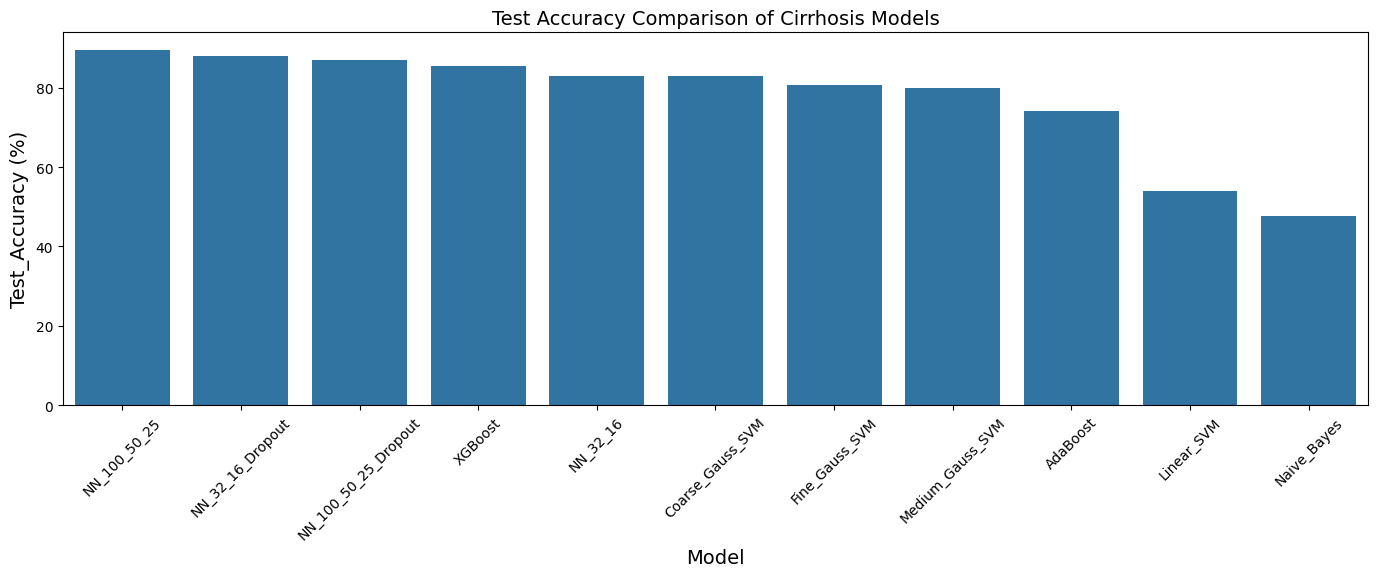

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.barplot(x='Model', y='Test_Accuracy (%)', data=results_df)
plt.xticks(rotation=45)
plt.title('Test Accuracy Comparison of Cirrhosis Models')
plt.tight_layout()
plt.show()


In [107]:
results_df.to_csv('cirrhosis_model_comparison.csv', index=False)

In [108]:
top_5_models = results_df.head(5)
print("Top 5 Performing Models:")
display(top_5_models)

Top 5 Performing Models:


Model  Train_Accuracy (%)  Test_Accuracy (%)  \
0          NN_100_50_25              100.00             89.510   
3      NN_32_16_Dropout               97.37             87.900   
1  NN_100_50_25_Dropout               99.79             87.090   
4               XGBoost               99.39             85.480   
2              NN_32_16              100.00             83.064   

   Training_Time (s)  Prediction_Speed (obs/sec)  
0               11.0                        1459  
3                9.0                        1208  
1                9.0                        1137  
4                1.0                         124  
2                9.0                         911

In [207]:
best_xgb = model_xgb     
best_nn = model      
best_svm = coarse_gauss_clf  
print(best_xgb)
print(best_nn)
print(best_svm)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=4, ...)
SVC(C=0.1, gamma=16.97056274847714)


In [110]:
import pickle
# Save XGBoost
with open("models/best_xgb.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

# Save Neural Network
with open("models/best_nn.pkl", "wb") as f:
    pickle.dump(model, f)

# Save SVM
with open("models/best_svm.pkl", "wb") as f:
    pickle.dump(best_svm, f)

__SHAP implementation__

In [129]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [130]:
sample_size = min(500, len(X_test))  # Use up to 500 points or all available
X_test_large = X_test.sample(n=sample_size, random_state=42)
y_test_large = y_test.loc[X_test_large.index]

print(f"Using {len(X_test_large)} data points for SHAP analysis...")

# Calculate SHAP values for the larger sample
explainer_xgb = shap.TreeExplainer(best_xgb)
shap_values_large = explainer_xgb.shap_values(X_test_large)

print("✅ SHAP values calculated for larger sample")

Using 124 data points for SHAP analysis...
✅ SHAP values calculated for larger sample


<Figure size 1200x1000 with 0 Axes>

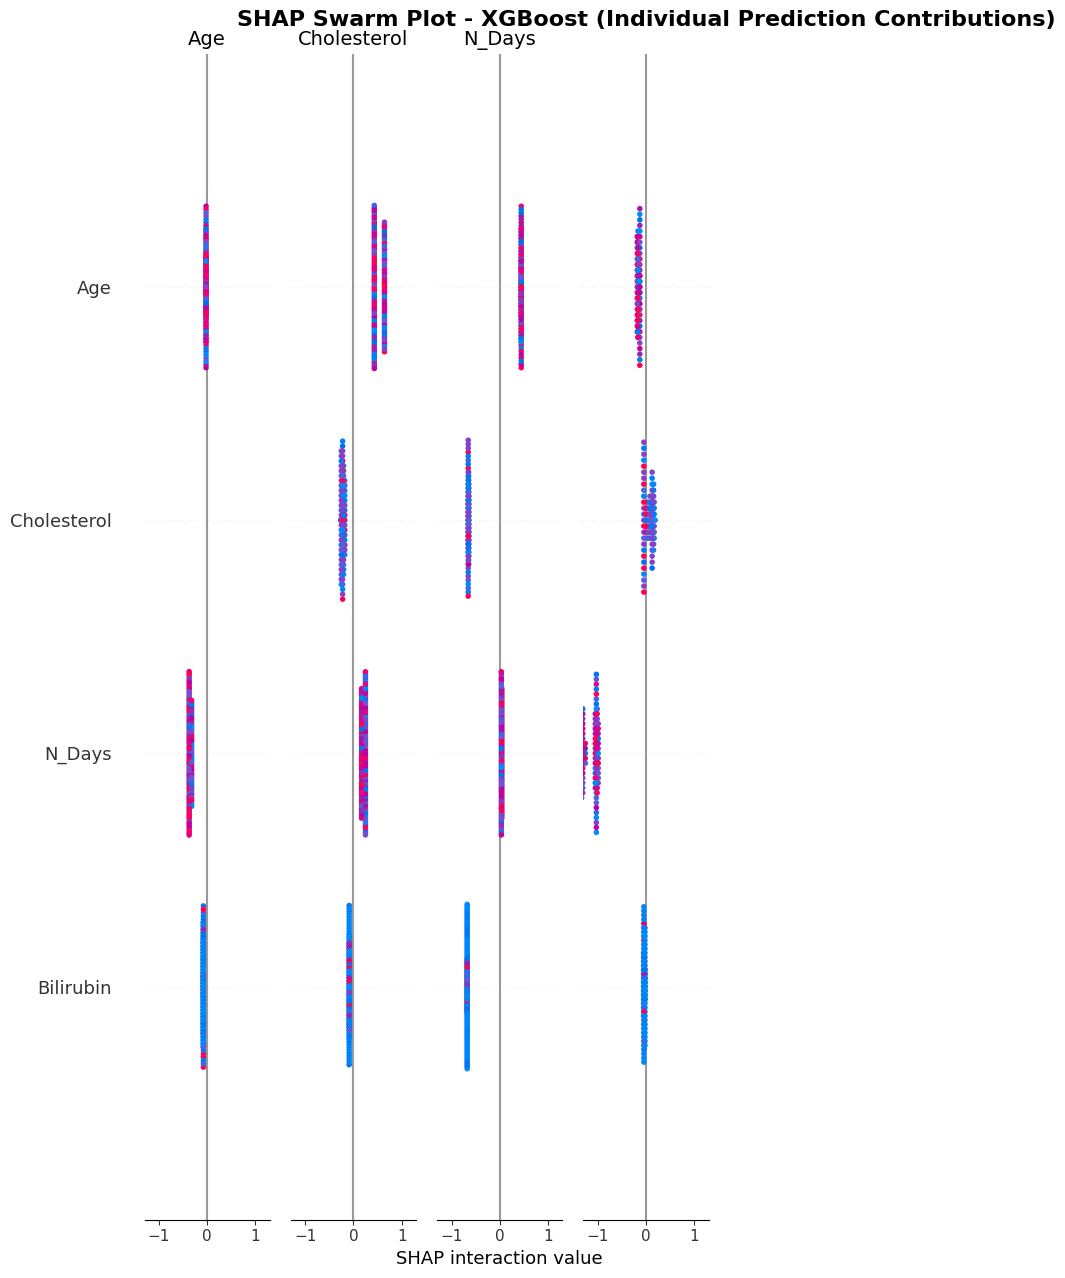

In [132]:
plt.figure(figsize=(12, 10))
shap.summary_plot(
    shap_values_large, 
    X_test_large,
    feature_names=X.columns,
    plot_type=None,  # This creates the swarm plot (default)
    max_display=15,  # Show top 15 features
    show=False
)
plt.title('SHAP Swarm Plot - XGBoost (Individual Prediction Contributions)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [139]:
from sklearn.model_selection import train_test_split

# Sample more data while maintaining class balance
X_balanced, _, y_balanced, _ = train_test_split(
    X_train, y_train, 
    train_size=200,  # Use 200 samples
    stratify=y_train,  # Keep class proportions
    random_state=42
)

explainer_xgb = shap.TreeExplainer(best_xgb)
shap_values_large = explainer_xgb.shap_values(X_balanced)

✅ Plotted SHAP for Stage 0 (No Fibrosis)
✅ Plotted SHAP for Stage 1 (Mild)
✅ Plotted SHAP for Stage 2 (Moderate)
✅ Plotted SHAP for Stage 3 (Severe)


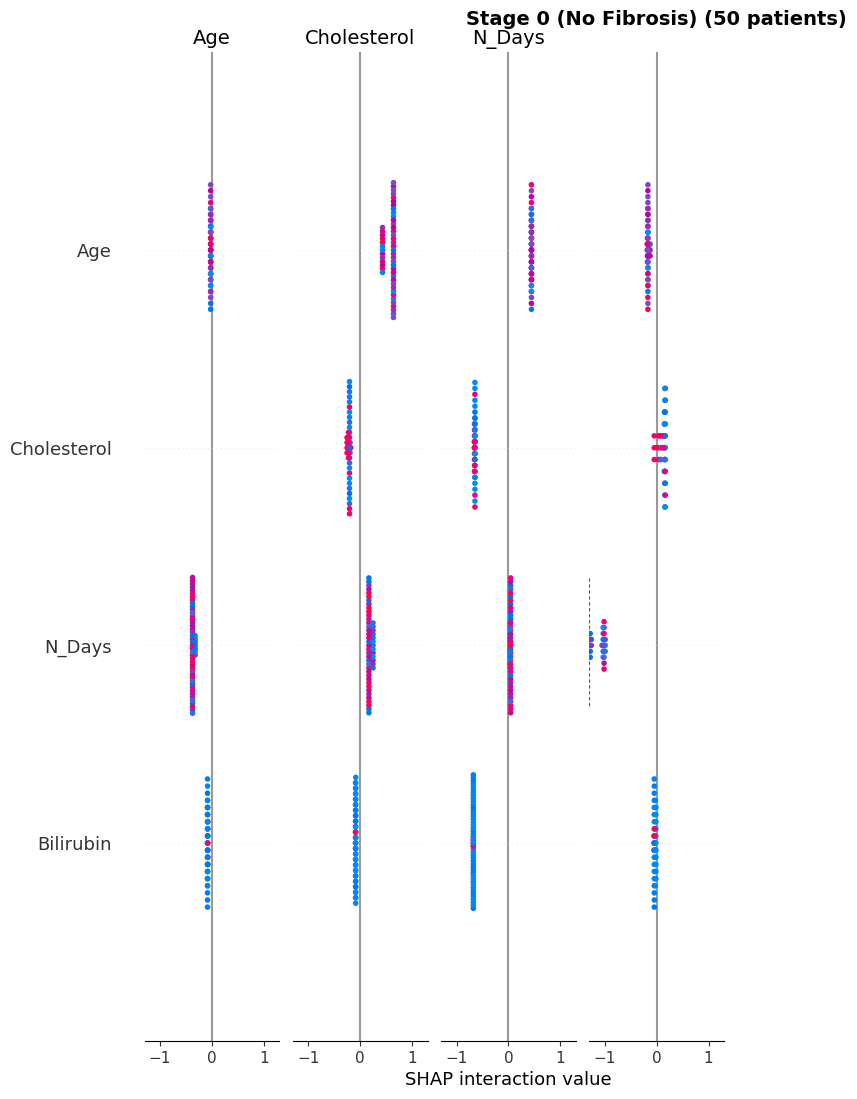

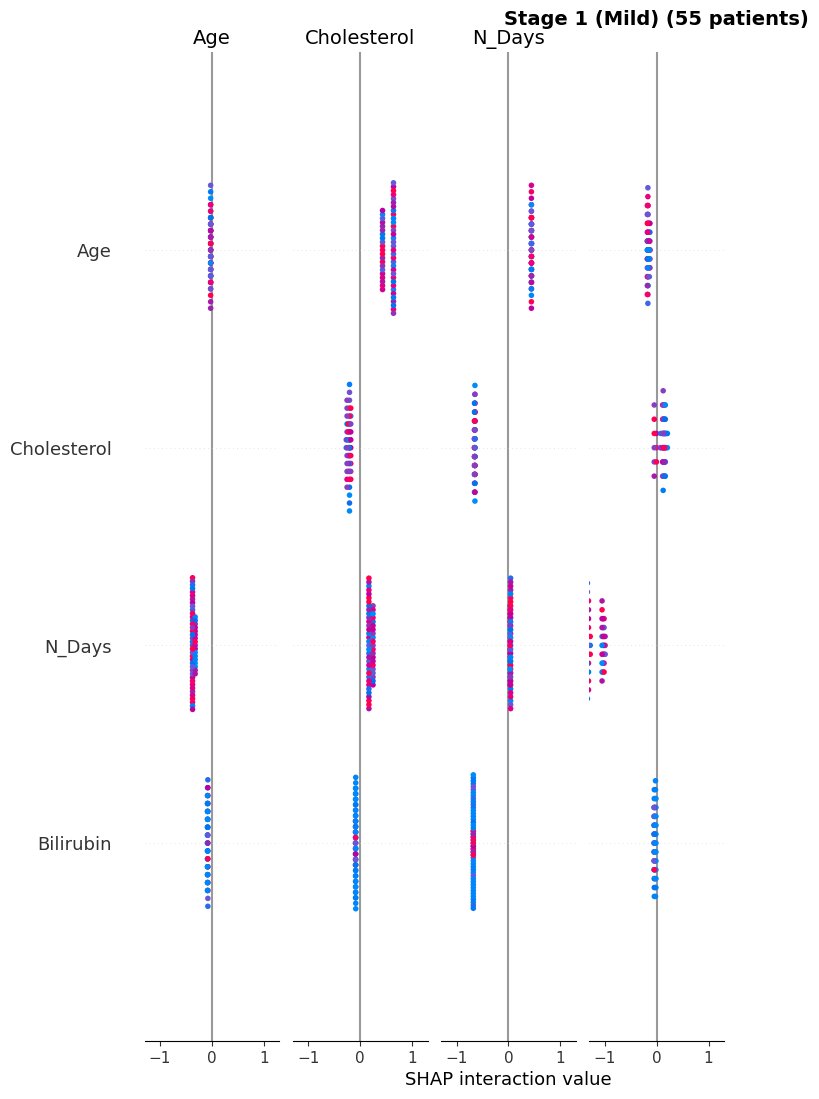

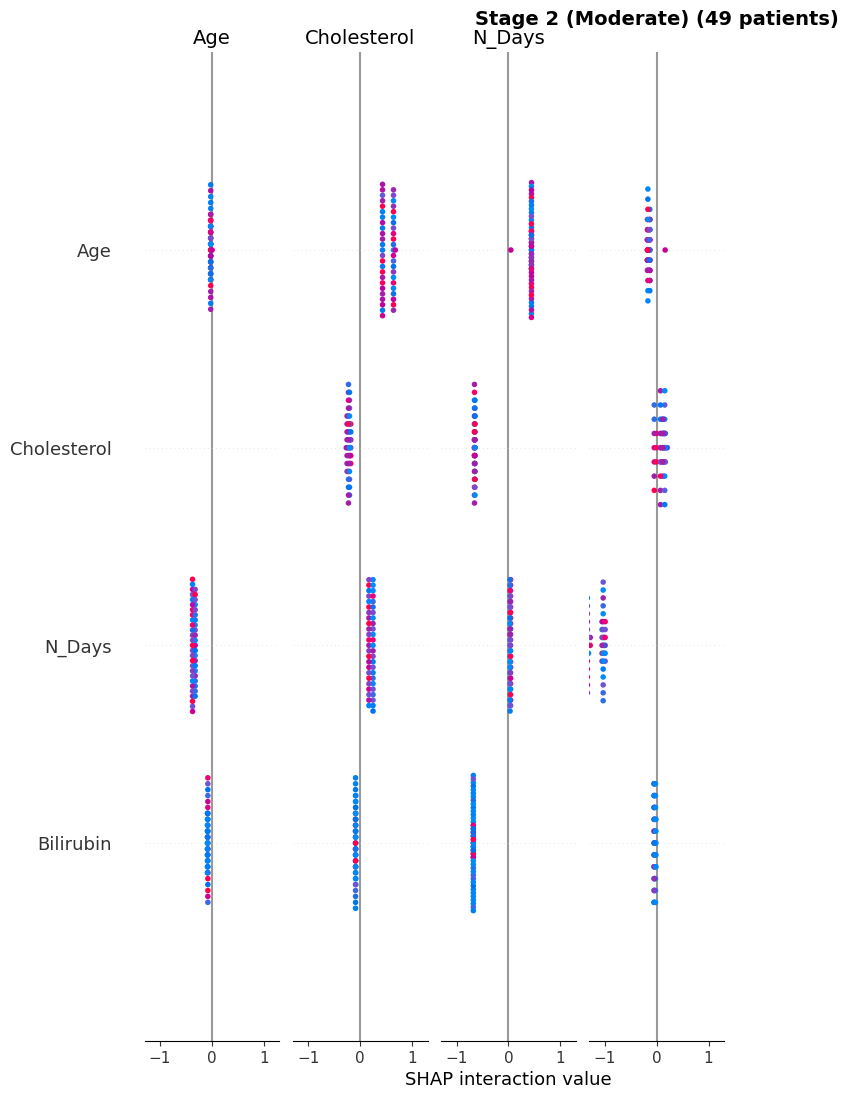

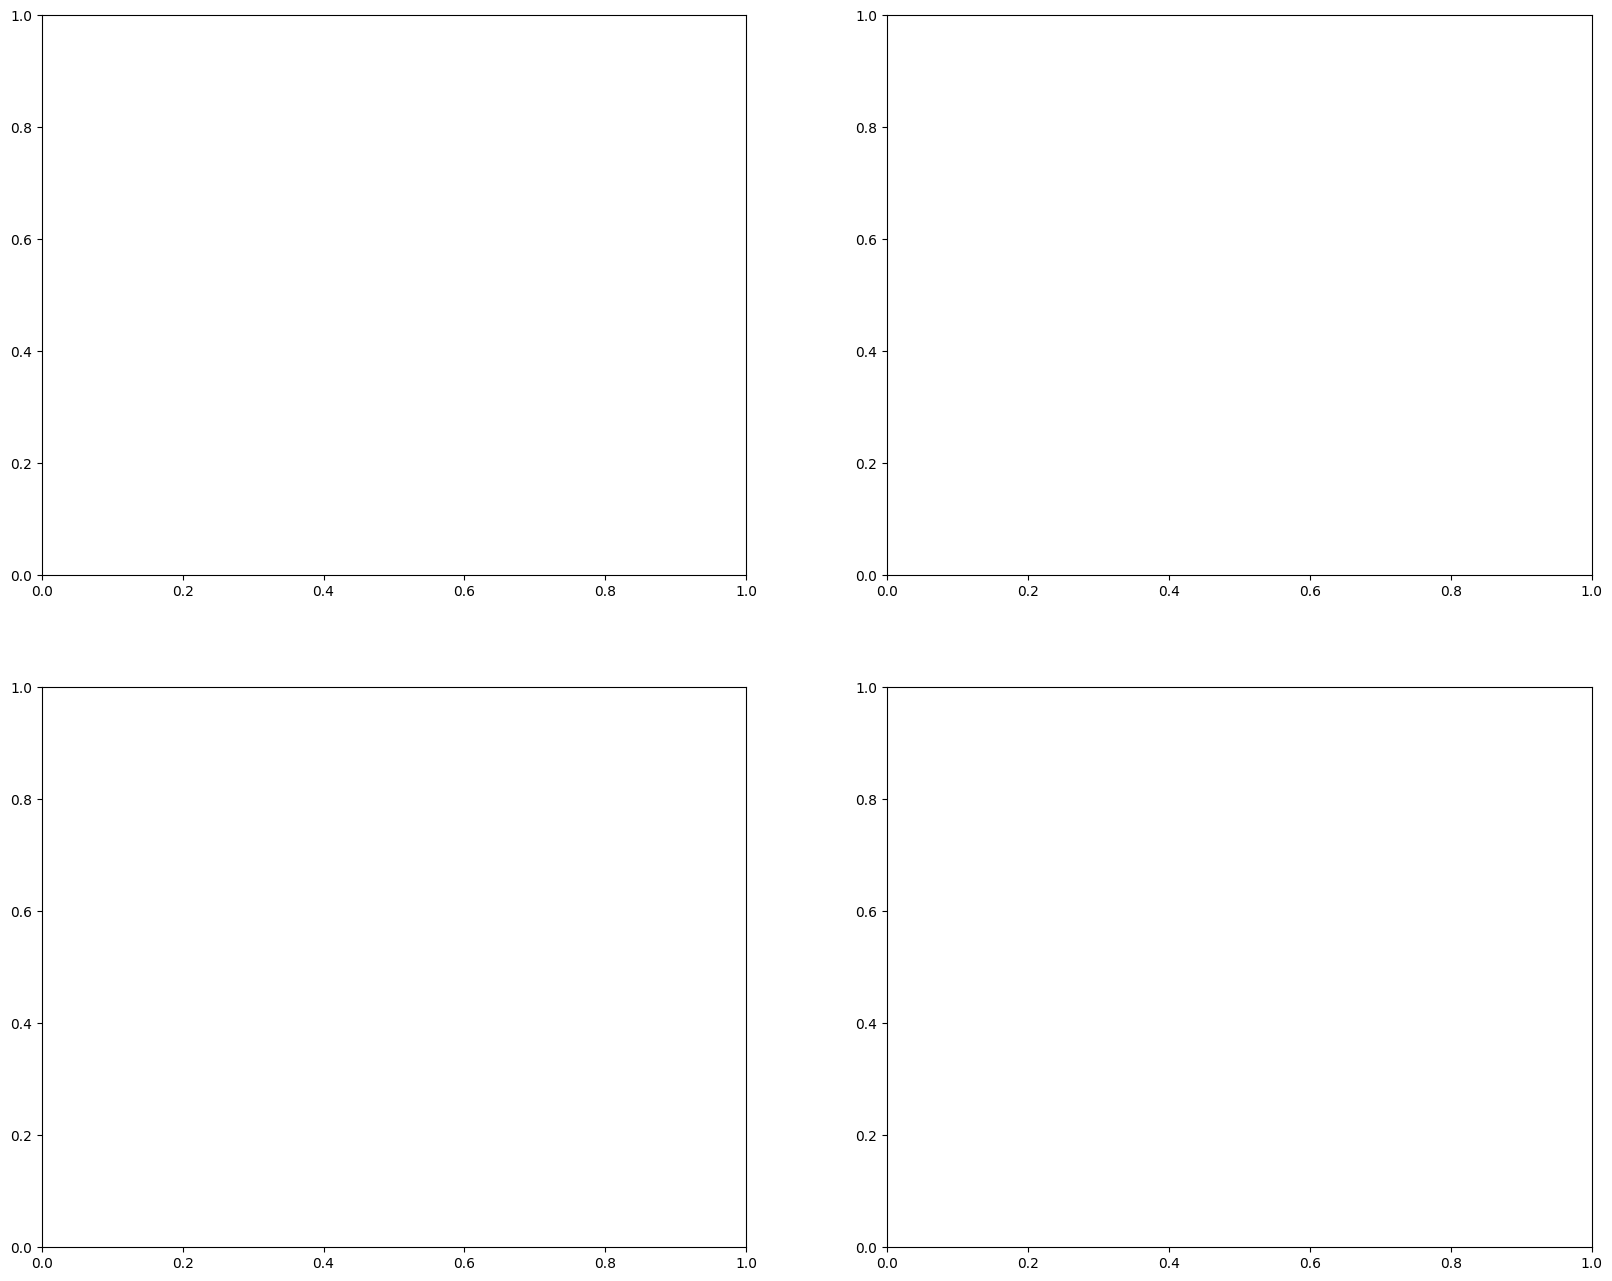

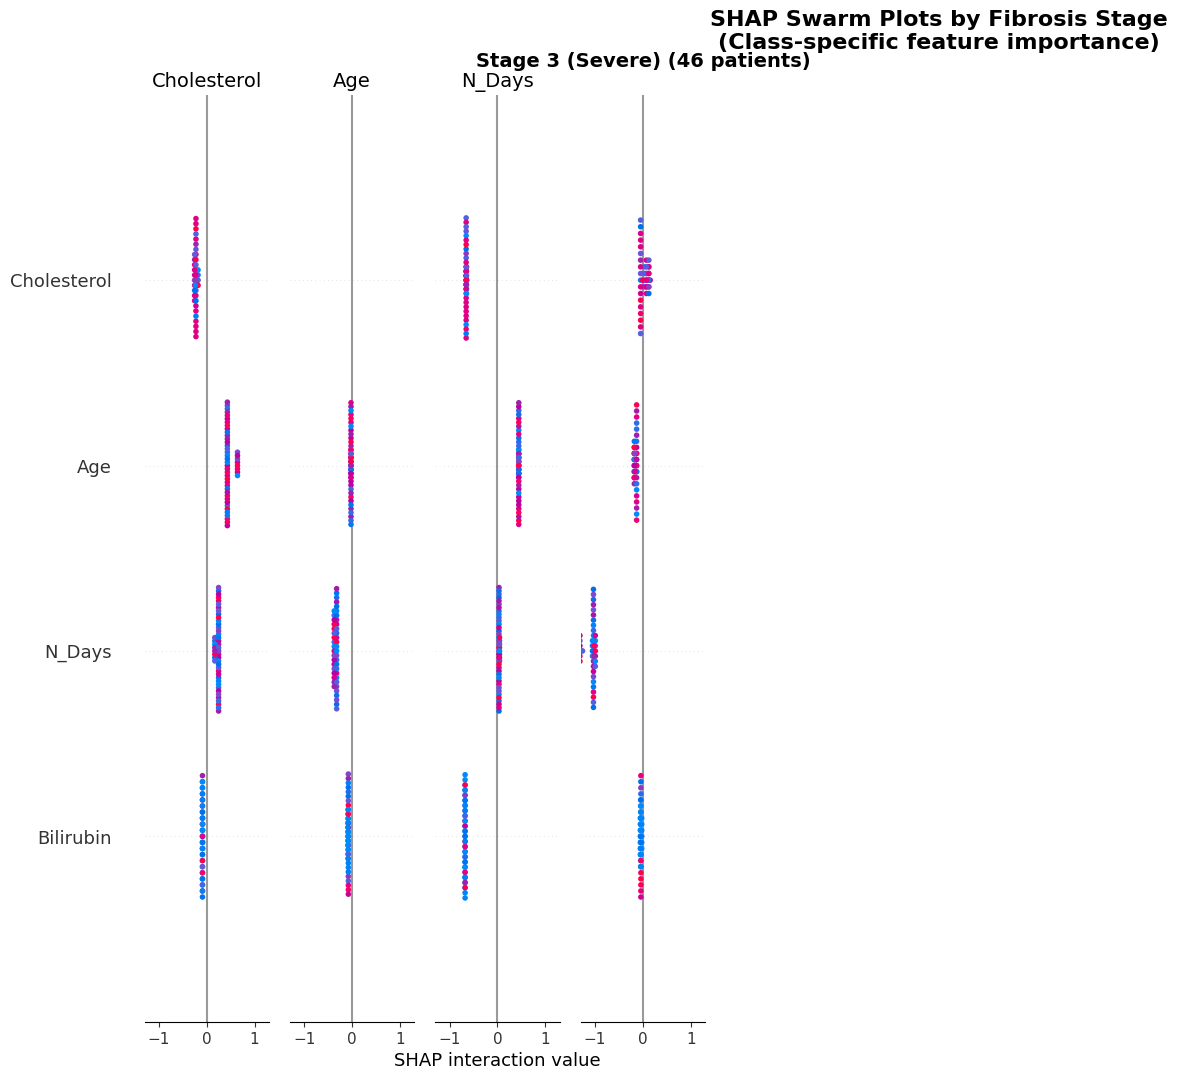


✅ All class-wise SHAP swarm plots generated.
Data shape used: (200, 18)
Class distribution: {0.0: 50, 1.0: 55, 2.0: 49, 3.0: 46}


In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np


X_used = X_train  
y_used = y_train

try:
    n_samples = len(X_used)
    n_features = X_used.shape[1]
    n_classes = 4

    # Case 1: Already a list of SHAP arrays (multi-class format)
    if isinstance(shap_values_large, list) and len(shap_values_large) == n_classes:
        shap_values_fixed = shap_values_large

    # Case 2: SHAP is a 2D array like (n_samples, n_features * n_classes)
    elif isinstance(shap_values_large, np.ndarray) and shap_values_large.shape[1] == n_features * n_classes:
        print("🔧 Flattened SHAP array detected. Reshaping to (samples, features, classes)...")
        shap_reshaped = shap_values_large.reshape(n_samples, n_features, n_classes)
        shap_values_fixed = [shap_reshaped[:, :, i] for i in range(n_classes)]
        print("✅ SHAP reshaped successfully.")

    # Case 3: Bad format or binary SHAP
    else:
        raise ValueError("Unsupported SHAP format. Please recompute SHAP values properly.")

except Exception as e:
    explainer_xgb = shap.TreeExplainer(best_xgb)
    n_samples = min(200, len(X_used))
    X_used = X_used.iloc[:n_samples]
    y_used = y_used.iloc[:n_samples]
    shap_values_fixed = explainer_xgb.shap_values(X_used)

# Convert y to zero-based if needed
if np.min(y_used) > 0:
    y_used = y_used - 1

# Stage labels
stage_names = ['Stage 0 (No Fibrosis)', 'Stage 1 (Mild)', 'Stage 2 (Moderate)', 'Stage 3 (Severe)']


for stage in range(4):
    stage_mask = (y_used == stage)
    stage_count = stage_mask.sum()

    if stage_count >= 3:
        plt.sca(axes[stage])
        stage_shap = shap_values_fixed[stage_mask]
        stage_X = X_used[stage_mask]

        try:
            shap.summary_plot(
                stage_shap,
                stage_X,
                feature_names=X_used.columns,
                plot_type="dot",
                max_display=min(12, stage_X.shape[1]),
                show=False
            )
            plt.title(f'{stage_names[stage]} ({stage_count} patients)', fontsize=14, fontweight='bold', pad=20)
            print(f"✅ Plotted SHAP for {stage_names[stage]}")

        except Exception as e:
            print(f"❌ Plotting error: {e}")
            axes[stage].text(0.5, 0.5, f'{stage_names[stage]}\nPlot Error\n{str(e)[:40]}...',
                             ha='center', va='center', transform=axes[stage].transAxes,
                             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
    else:
        axes[stage].text(0.5, 0.5, f'{stage_names[stage]}\nInsufficient data\n({stage_count} patients)',
                         ha='center', va='center', transform=axes[stage].transAxes,
                         fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        axes[stage].set_xticks([])
        axes[stage].set_yticks([])

plt.tight_layout()
plt.suptitle('SHAP Swarm Plots by Fibrosis Stage\n(Class-specific feature importance)', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Summary
print("\n✅ All class-wise SHAP swarm plots generated.")
print(f"Data shape used: {X_used.shape}")
print(f"Class distribution: {dict(zip(*np.unique(y_used, return_counts=True)))}")


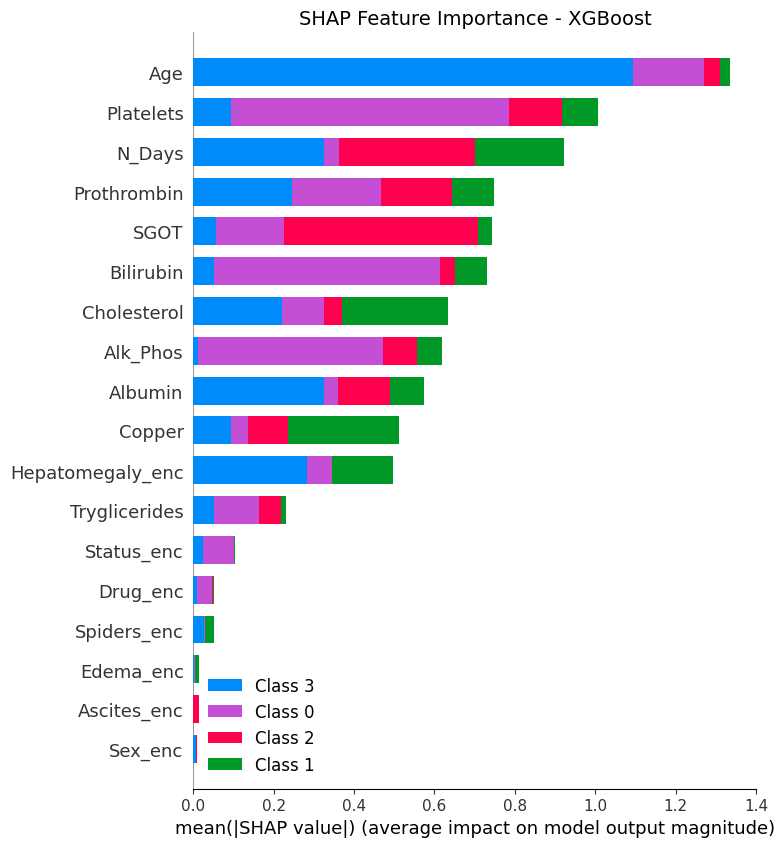

In [117]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", 
                  feature_names=X.columns, show=False)
plt.title('SHAP Feature Importance - XGBoost')
plt.tight_layout()
plt.show()

__NEURAL NETWORK SHAP ANALYSIS__


📊 Plotting SHAP summary for Class 0


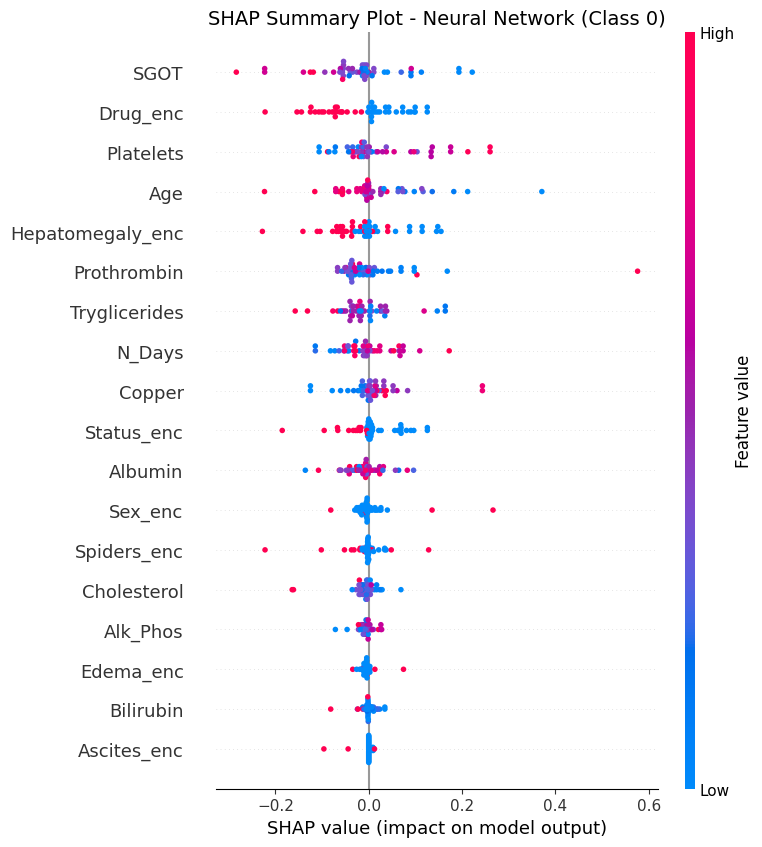


📊 Plotting SHAP summary for Class 1


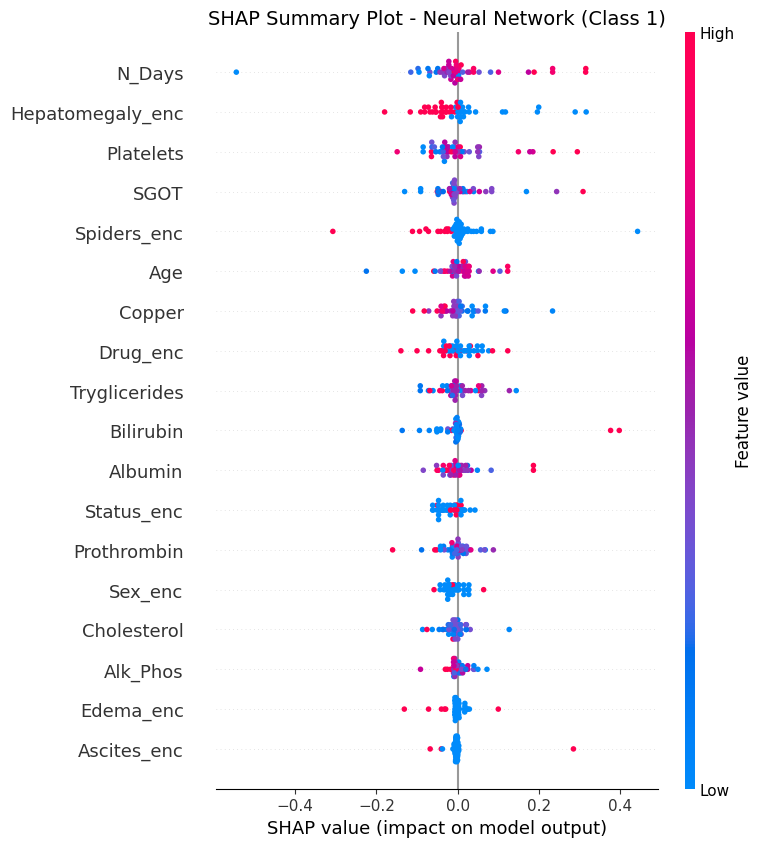


📊 Plotting SHAP summary for Class 2


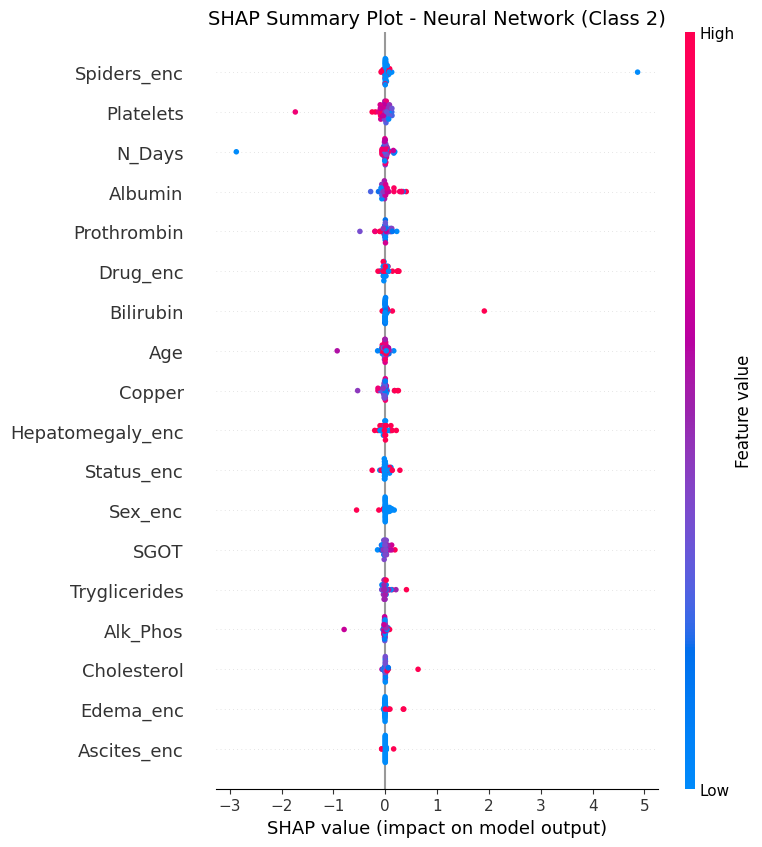


📊 Plotting SHAP summary for Class 3


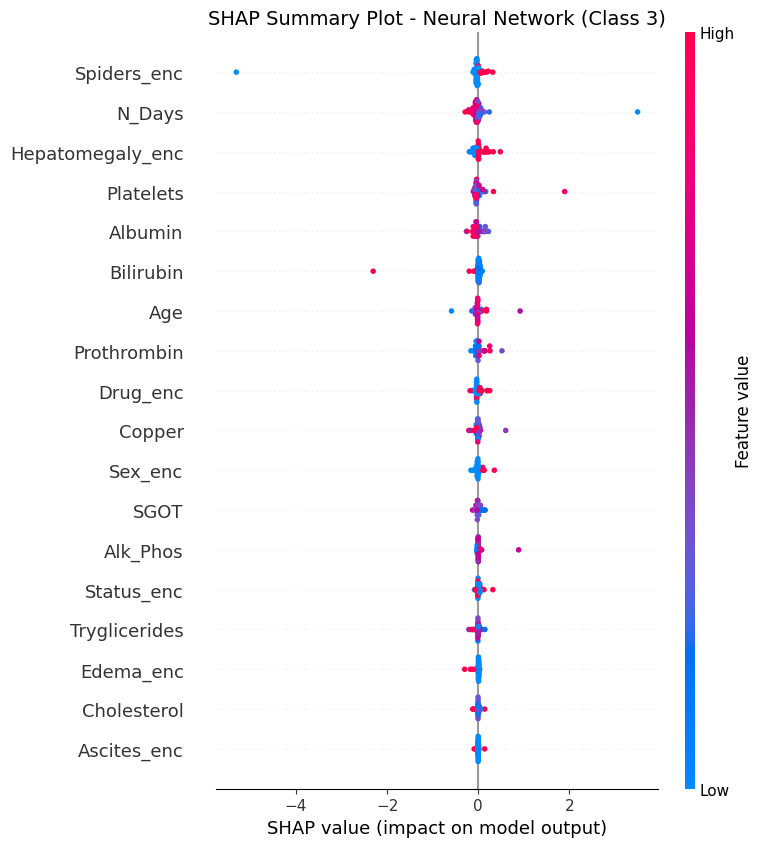

In [221]:
import matplotlib.pyplot as plt
import shap

# Loop over all 4 classes
for class_idx in range(4):
    print(f"\n📊 Plotting SHAP summary for Class {class_idx}")

    shap_class_values = shap_values[:, :, class_idx]  # (50, 18) for this class

    # Plot SHAP summary for this class
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        shap_class_values,
        test_sample_df,                # must be DataFrame or array of shape (50, 18)
        feature_names=X_train.columns, # or test_sample_df.columns
        plot_type="dot",               # swarm plot
        show=False
    )
    plt.title(f"SHAP Summary Plot - Neural Network (Class {class_idx})")
    plt.tight_layout()
    plt.show()


✅ Plotting SHAP for Stage 0 (No Fibrosis)
✅ Plotting SHAP for Stage 1 (Mild)
✅ Plotting SHAP for Stage 2 (Moderate)
✅ Plotting SHAP for Stage 3 (Severe)


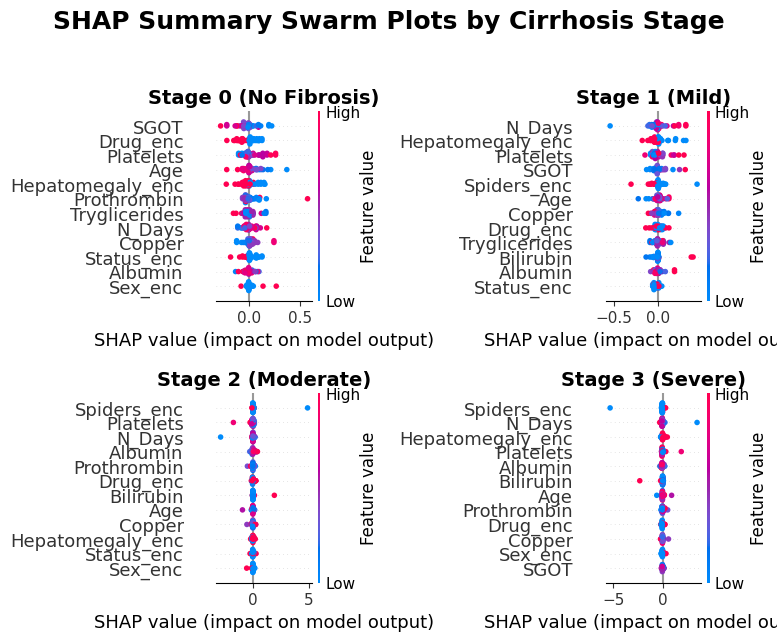

In [222]:
import shap
import matplotlib.pyplot as plt

# Stage names for better plot titles
stage_names = [
    "Stage 0 (No Fibrosis)",
    "Stage 1 (Mild)",
    "Stage 2 (Moderate)",
    "Stage 3 (Severe)"
]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()  # Flatten to easily index like axes[0], axes[1], ...

# Loop over classes
for class_idx in range(4):
    print(f"✅ Plotting SHAP for {stage_names[class_idx]}")
    
    shap_class_values = shap_values[:, :, class_idx]  # (samples, features)
    
    # Set the axis for the subplot
    plt.sca(axes[class_idx])  # Set current subplot axis
    
    # Generate the SHAP summary plot on the chosen axis
    shap.summary_plot(
        shap_class_values,
        test_sample_df,
        feature_names=test_sample_df.columns,
        plot_type="dot",
        show=False,
        max_display=12  # Adjust to your preference
    )
    
    axes[class_idx].set_title(stage_names[class_idx], fontsize=14, fontweight='bold')

# Add a big overall title
plt.suptitle("SHAP Summary Swarm Plots by Cirrhosis Stage", fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


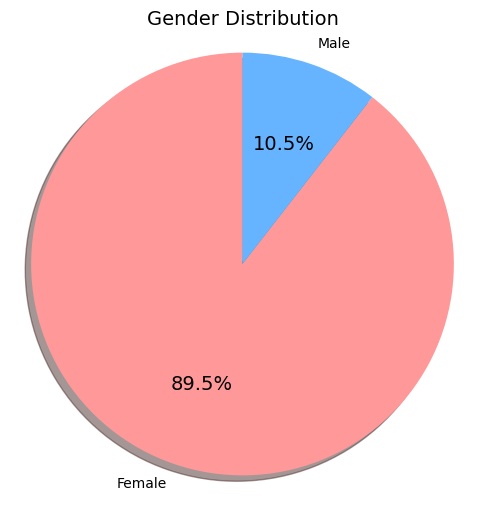

In [17]:
import matplotlib.pyplot as plt

# Plot simulated 3D pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=['Female', 'Male'],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,  # This gives a 3D-like appearance
    colors=['#ff9999', '#66b3ff']
)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("dataset/cirrhosis.csv")

# List of numerical columns for descriptive statistics (based on common features in liver datasets)
numerical_columns = [
    'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
    'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'
]

# Drop rows with missing values in those columns to ensure accurate stats
df_clean = df[numerical_columns].dropna()

# Compute descriptive statistics
descriptive_stats = pd.DataFrame({
    'Mean': df_clean.mean(),
    'Std Devn.': df_clean.std(),
    'Kurt': df_clean.apply(lambda x: stats.kurtosis(x)),
    'Skew': df_clean.apply(lambda x: stats.skew(x))
})

# Round for cleaner display
descriptive_stats = descriptive_stats.round(4)
descriptive_stats.reset_index(inplace=True)
descriptive_stats.rename(columns={'index': 'Element'}, inplace=True)
descriptive_stats



Element        Mean  Std Devn.     Kurt    Skew
0            Age  18189.3261  3843.5556  -0.4994  0.1797
1      Bilirubin      3.3337     4.6011   8.7099  2.8288
2    Cholesterol    371.2609   234.7884  13.6271  3.3436
3        Albumin      3.5168     0.4048   0.8709 -0.5942
4         Copper    100.7681    88.2687   7.0522  2.2541
5       Alk_Phos   1996.6116  2115.4779   9.9857  3.0185
6           SGOT    124.1192    56.7200   4.4896  1.4641
7  Tryglicerides    124.9783    65.2808  11.6969  2.5275
8      Platelets    261.7717    93.1289   0.0613  0.3718
9    Prothrombin     10.7355     1.0083   6.4662  1.7998

C:\Users\Aritro\AppData\Local\Temp\ipykernel_9788\787870726.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=positive_corr.values, y=positive_corr.index, palette='viridis')


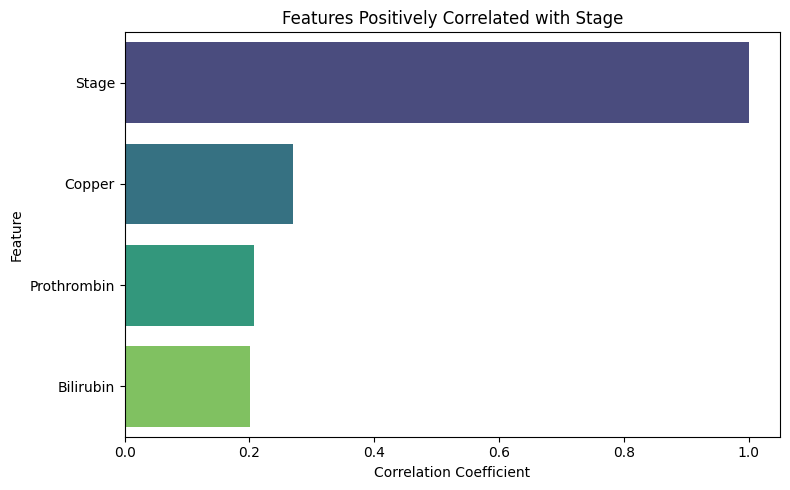

C:\Users\Aritro\AppData\Local\Temp\ipykernel_9788\787870726.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_corr.values, y=negative_corr.index, palette='coolwarm')


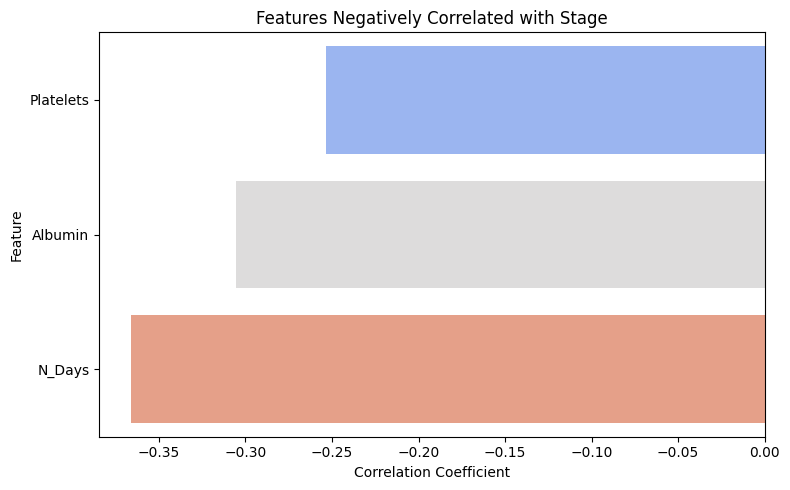

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/cirrhosis.csv")
# Assuming your DataFrame is named df
correlation_matrix = df.corr(numeric_only=True)

# Correlation with target variable
target_corr = correlation_matrix["Stage"].sort_values(ascending=False)

# Positive correlations
positive_corr = target_corr[target_corr > 0.2]
# Negative correlations
negative_corr = target_corr[target_corr < -0.2]

# Plotting positive correlations
plt.figure(figsize=(8, 5))
sns.barplot(x=positive_corr.values, y=positive_corr.index, palette='viridis')
plt.title("Features Positively Correlated with Stage")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Plotting negative correlations
plt.figure(figsize=(8, 5))
sns.barplot(x=negative_corr.values, y=negative_corr.index, palette='coolwarm')
plt.title("Features Negatively Correlated with Stage")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [58]:
print(X.shape)

(620, 18)


In [75]:
import shap
import xgboost as xgb
import numpy as np
import pandas as pd

# Assume X is your preprocessed features (used to train XGBoost)
# model is your trained XGBoost model

# Step 1: Select a few samples to visualize
X_sample = X.iloc[0:5]  # Pick 5 samples (adjust as needed)

# Step 2: Create SHAP Explainer
explainer = shap.Explainer(model)

# For multiclass: this returns a list of arrays, one per class
shap_values_all_classes = explainer(X_sample)

# Choose the class index to visualize (e.g., class 0 for F1)
class_index = 0  


shap_values_class = shap_values_all_classes[:, :, class_index]


shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[class_index],
    shap_values=shap_values_class.values,
    features=X_sample,
    feature_names=X_sample.columns.tolist()
)

shap.save_html("force_plot_class0.html", shap.force_plot(
    base_value=explainer.expected_value[class_index],
    shap_values=shap_values_class.values,
    features=X_sample,
    feature_names=X_sample.columns.tolist()
))



The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


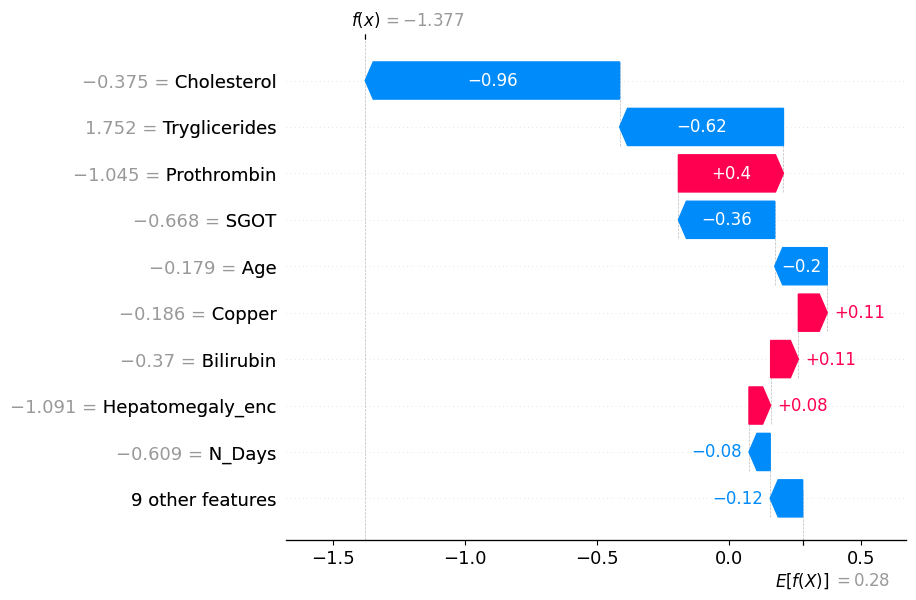

<Figure size 640x480 with 0 Axes>

In [76]:
import shap
import matplotlib.pyplot as plt

# Pick the sample and class index
sample_index = 0                # Sample number (0, 1, 2, ...)
class_index = 0                 # Class number (0, 1, 2 for multiclass)

# Extract SHAP values for the selected sample and class
shap_values_sample_class = shap_values_all_classes[sample_index, :, class_index]

# Plot waterfall
shap.plots.waterfall(shap_values_sample_class)

# Optional: Save to file for research paper
plt.tight_layout()
plt.savefig(f"waterfall_class{class_index}_sample{sample_index}.png", dpi=300, bbox_inches='tight')
plt.show()


Generating SHAP plots for class 0...


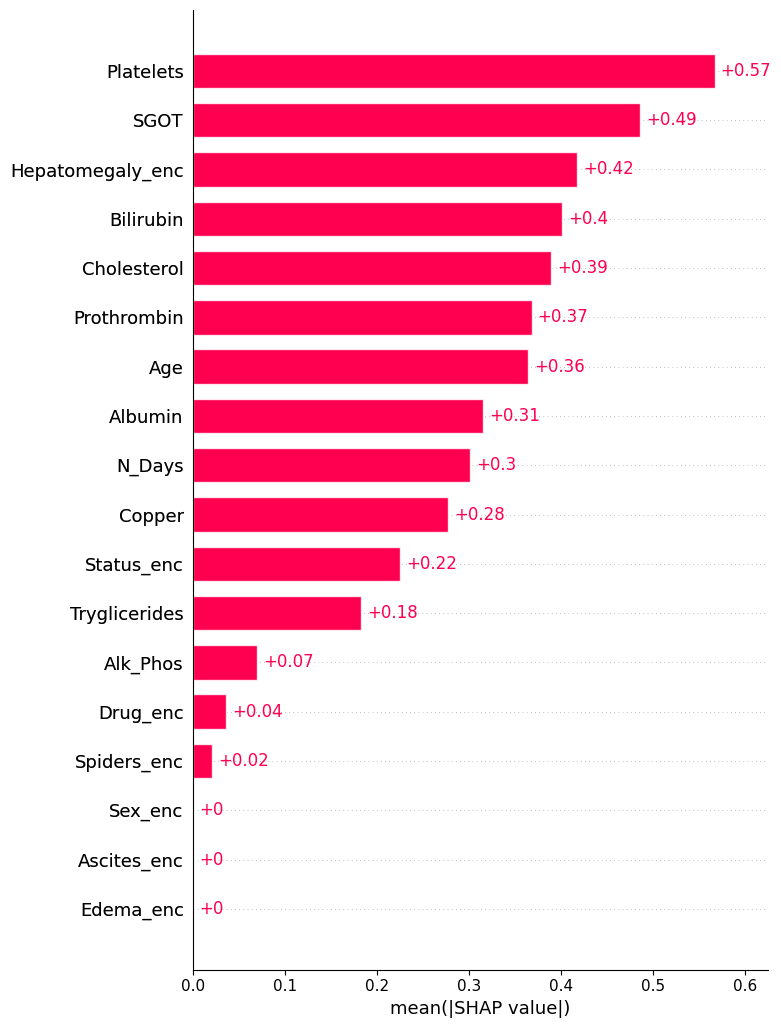

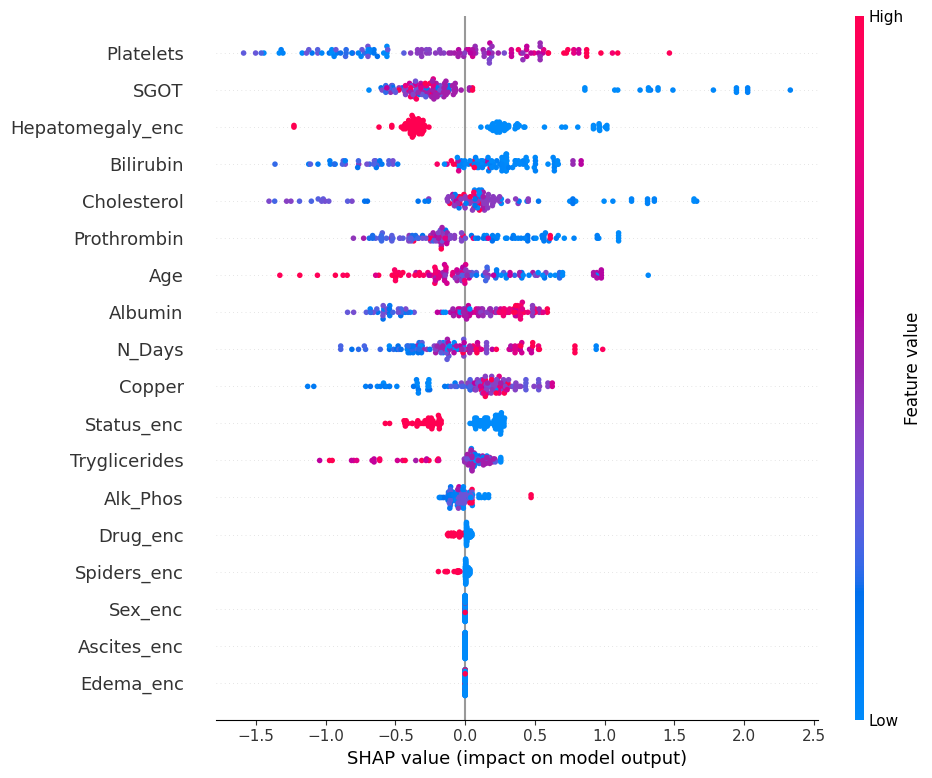

Generating SHAP plots for class 1...


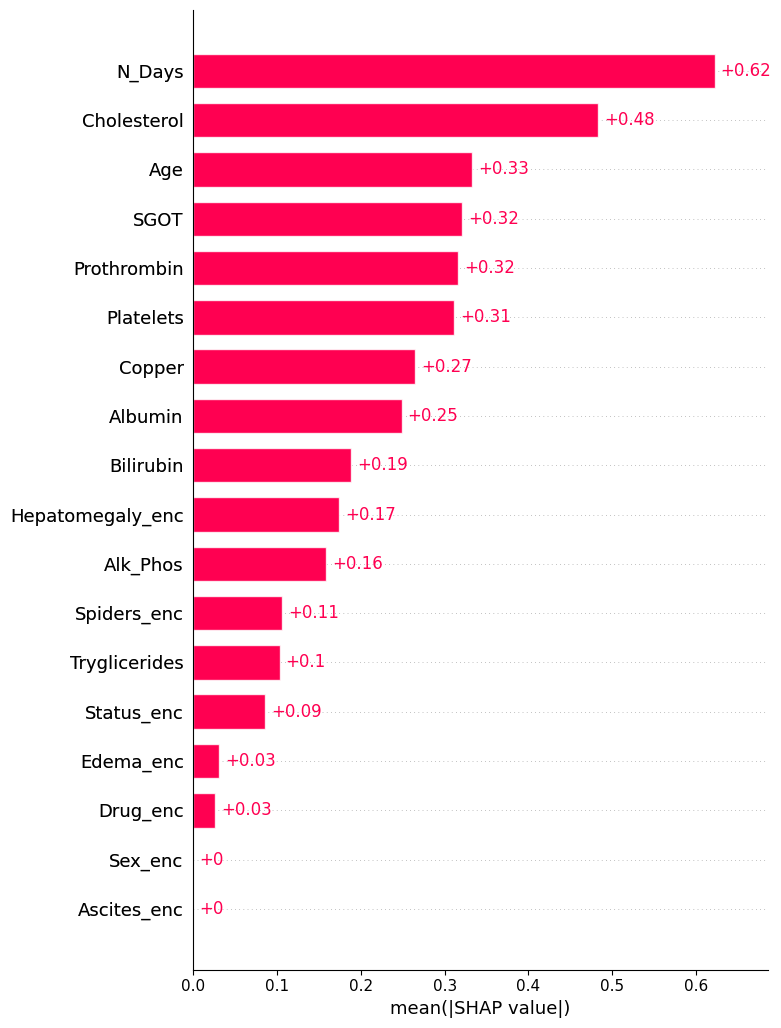

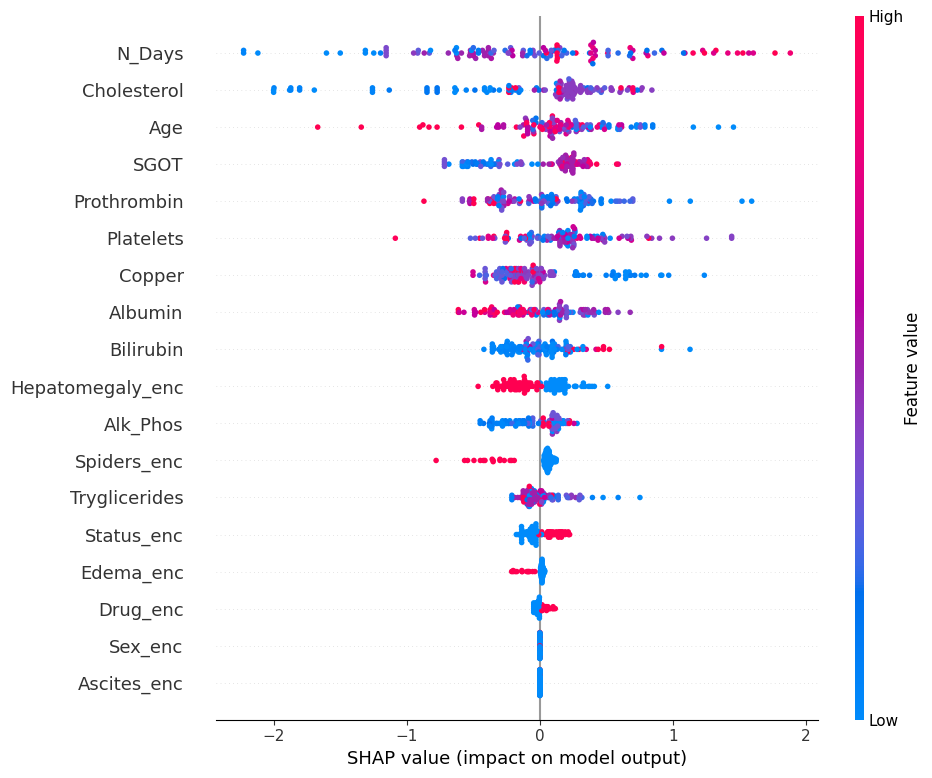

Generating SHAP plots for class 2...


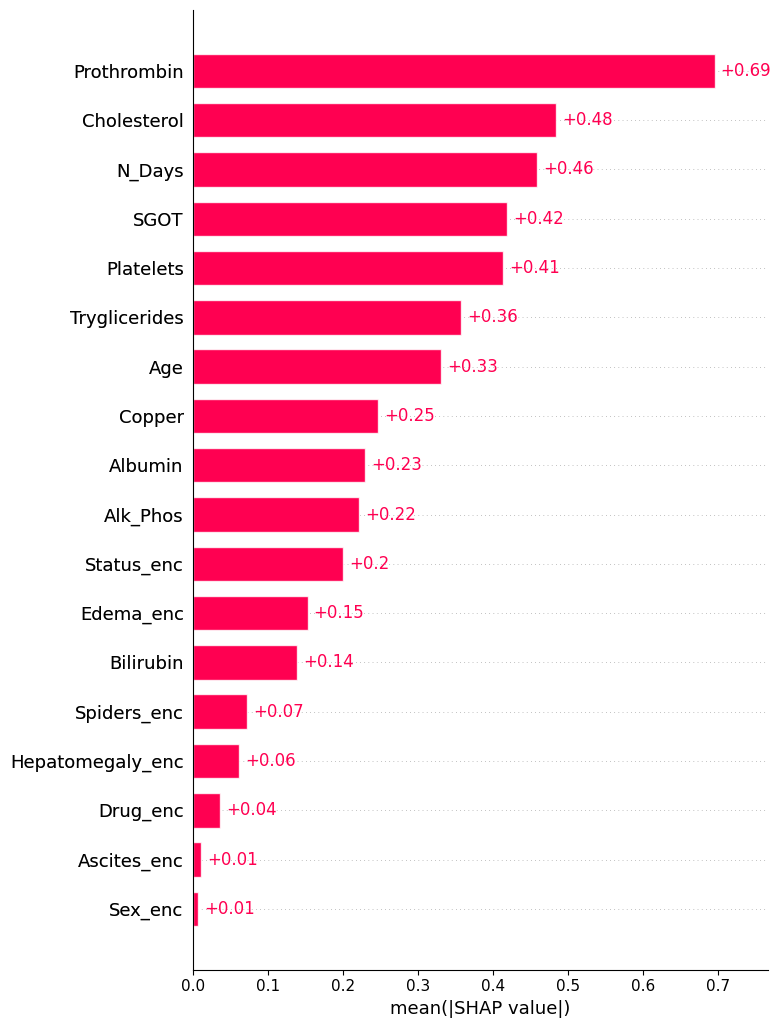

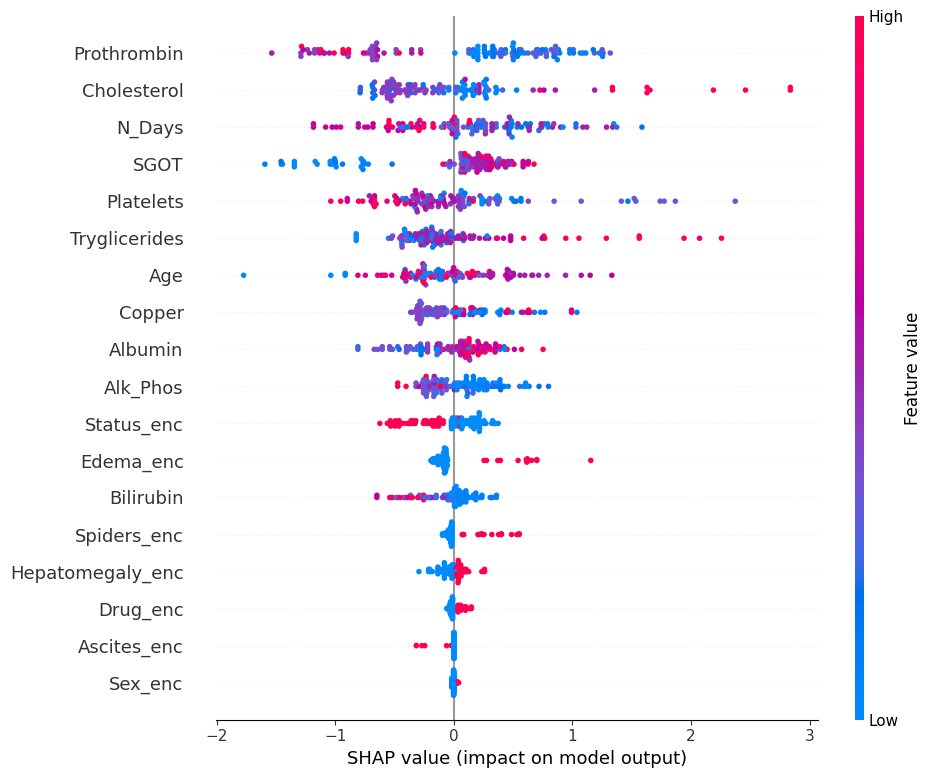

Generating SHAP plots for class 3...


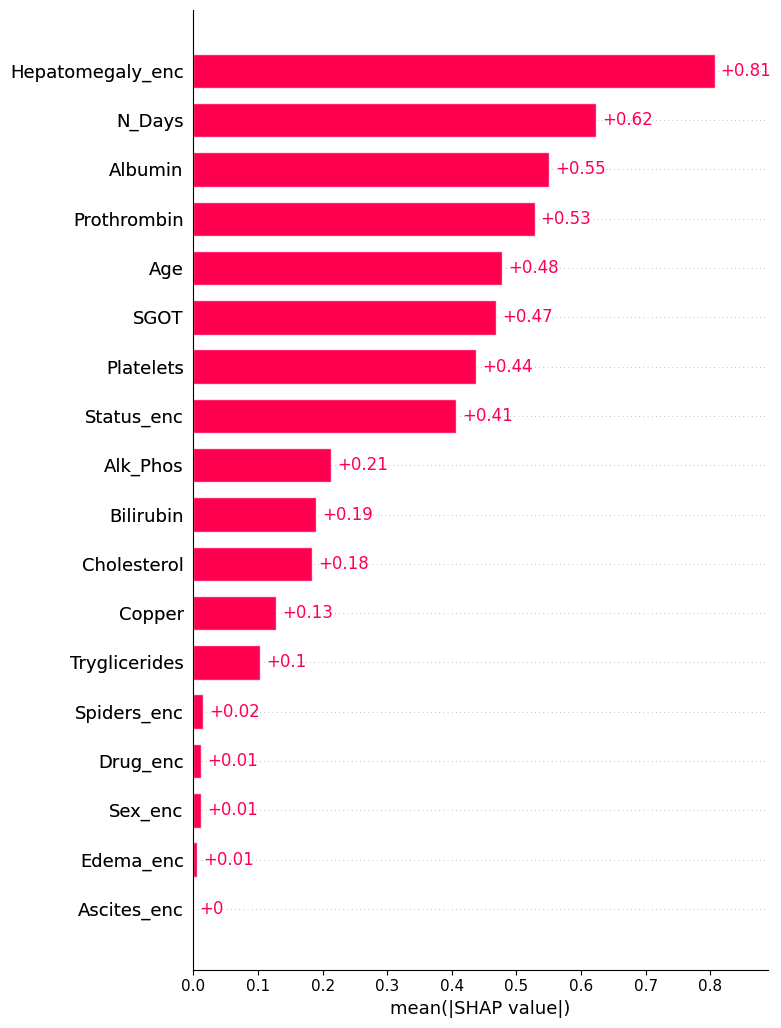

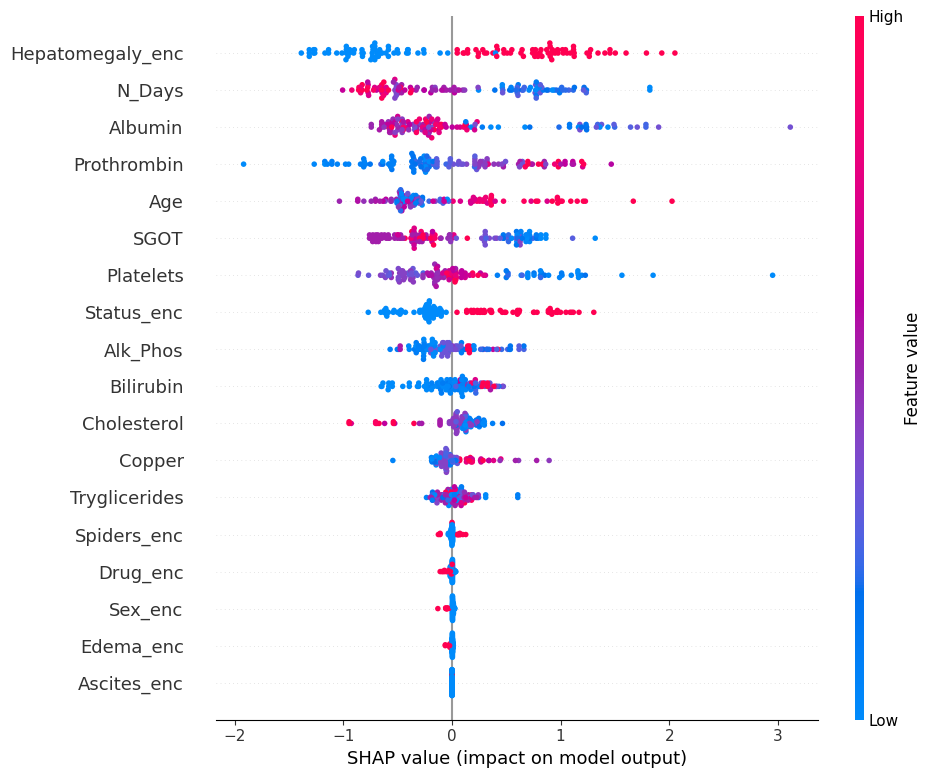

In [89]:
import shap
import matplotlib.pyplot as plt

# Train XGBoost model (assuming you've already preprocessed X_train, y_train)
model = xgb.XGBClassifier(enable_categorical=True, objective='multi:softprob', num_class=4)
model.fit(X_train, y_train)

# Create SHAP explainer and compute SHAP values on a larger subset or full test set
explainer = shap.Explainer(model, X_train)
shap_values_all = explainer(X_test)  # Use more data, like X_test or even X_train

# Loop through each class to generate detailed violin summary plots
for class_index in range(4):
    print(f"Generating SHAP plots for class {class_index}...")

    # Bar plot of global feature importance
    shap.plots.bar(shap_values_all[:, :, class_index], max_display=20, show=False)
    plt.tight_layout()
    plt.savefig(f"global_feature_importance_class{class_index}.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Violin-style summary plot with more points and clearer features
    shap.summary_plot(
        shap_values_all[:, :, class_index],
        X_test,
        max_display=20,          # Show top 20 features
        plot_size=(10, 8),       # Larger plot size
        show=False
    )
    plt.tight_layout()
    plt.savefig(f"summary_plot_class{class_index}.png", dpi=300, bbox_inches='tight')
    plt.show()


 94%|=================== | 2325/2480 [00:15<00:01]       

Generating SHAP plots for class 0...


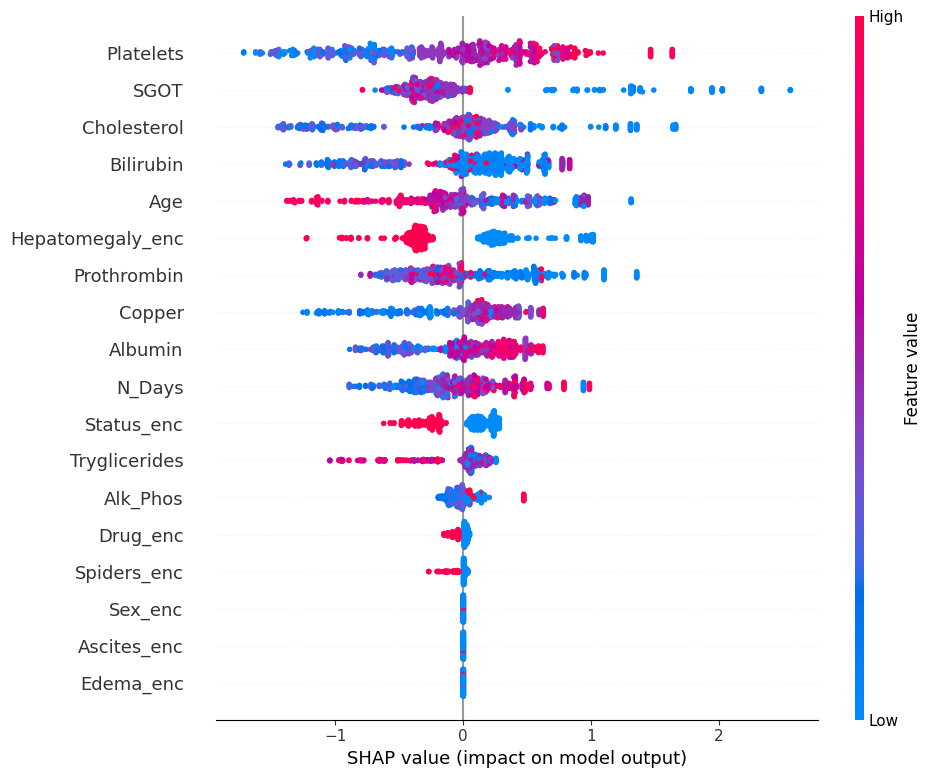

Generating SHAP plots for class 1...


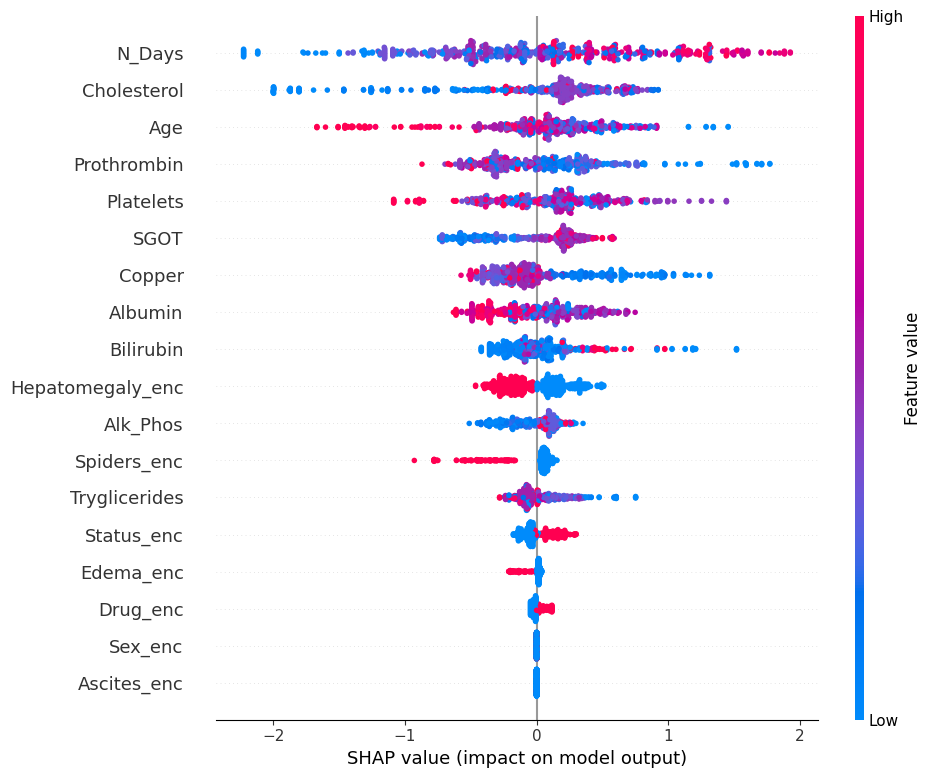

Generating SHAP plots for class 2...


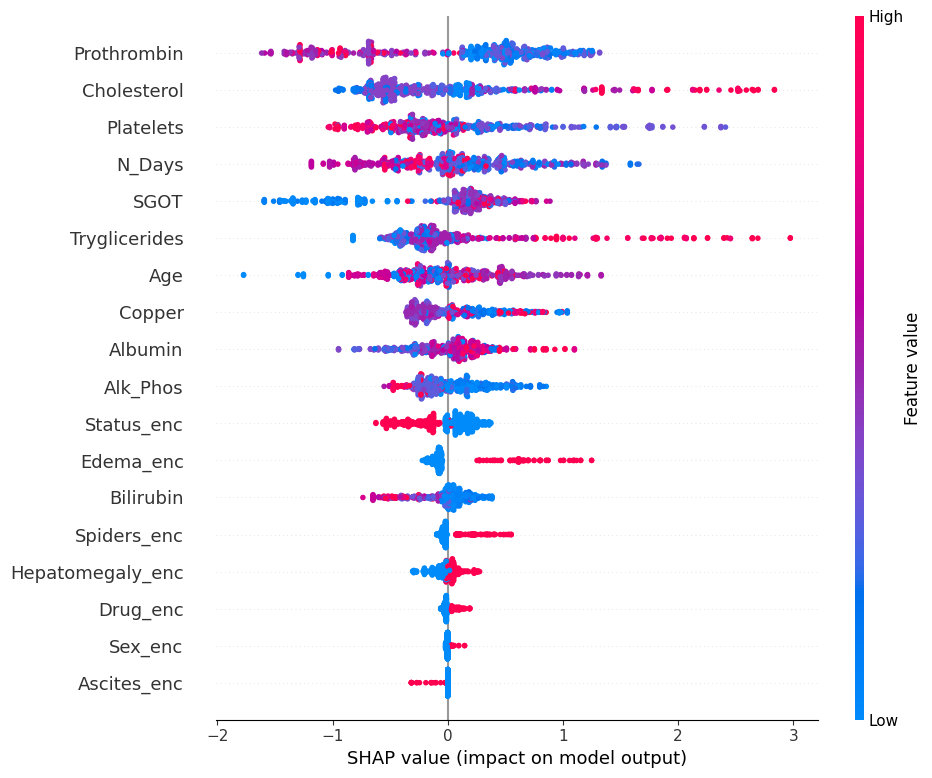

Generating SHAP plots for class 3...


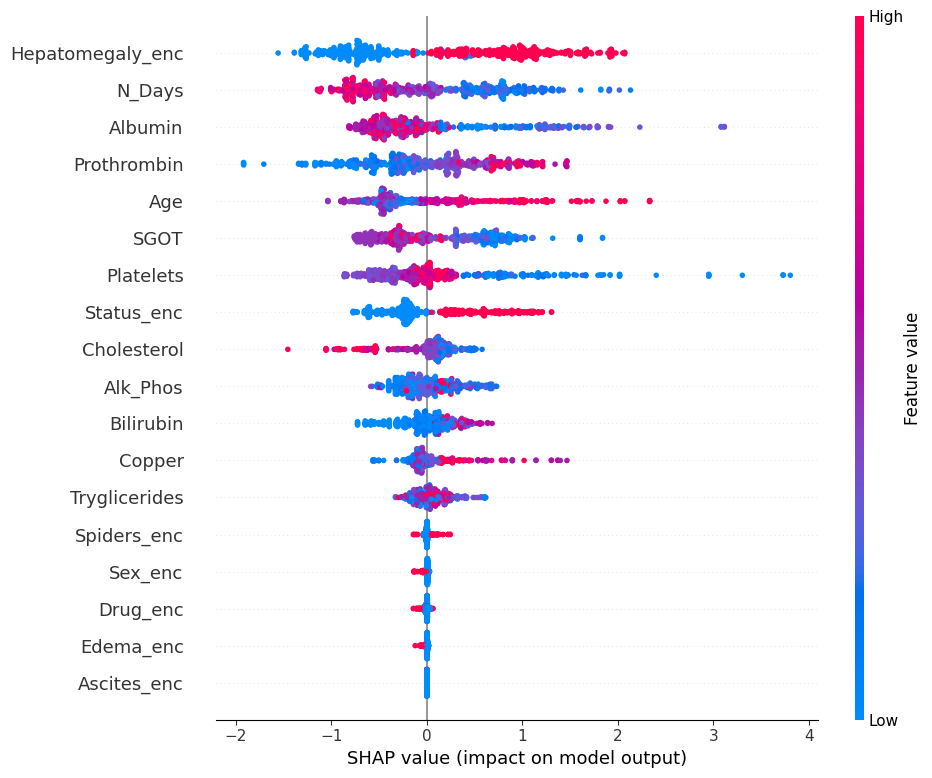

In [91]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

# Train XGBoost model
model = xgb.XGBClassifier(enable_categorical=True, objective='multi:softprob', num_class=4)
model.fit(X_train, y_train)

# Create SHAP explainer using training data
explainer = shap.Explainer(model, X_train)

# Combine train and test for more points (optional but makes plots denser)
X_full = pd.concat([X_train, X_test])

# Generate SHAP values on the full dataset
shap_values_all = explainer(X_full)

# Loop through each class (0 to 3)
for class_index in range(4):
    print(f"Generating SHAP plots for class {class_index}...")

    # Violin-style SHAP summary plot
    shap.summary_plot(
        shap_values_all[:, :, class_index],
        X_full,                     # ✅ Now using same data as SHAP computation
        max_display=20,
        plot_size=(10, 8),
        show=False
    )
    plt.tight_layout()
    plt.savefig(f"summary_plot_class{class_index}.png", dpi=300, bbox_inches='tight')
    plt.show()


 96%|=================== | 2384/2480 [00:15<00:00]       

Rendering SHAP summary for class 0...
Rendering SHAP summary for class 1...
Rendering SHAP summary for class 2...
Rendering SHAP summary for class 3...


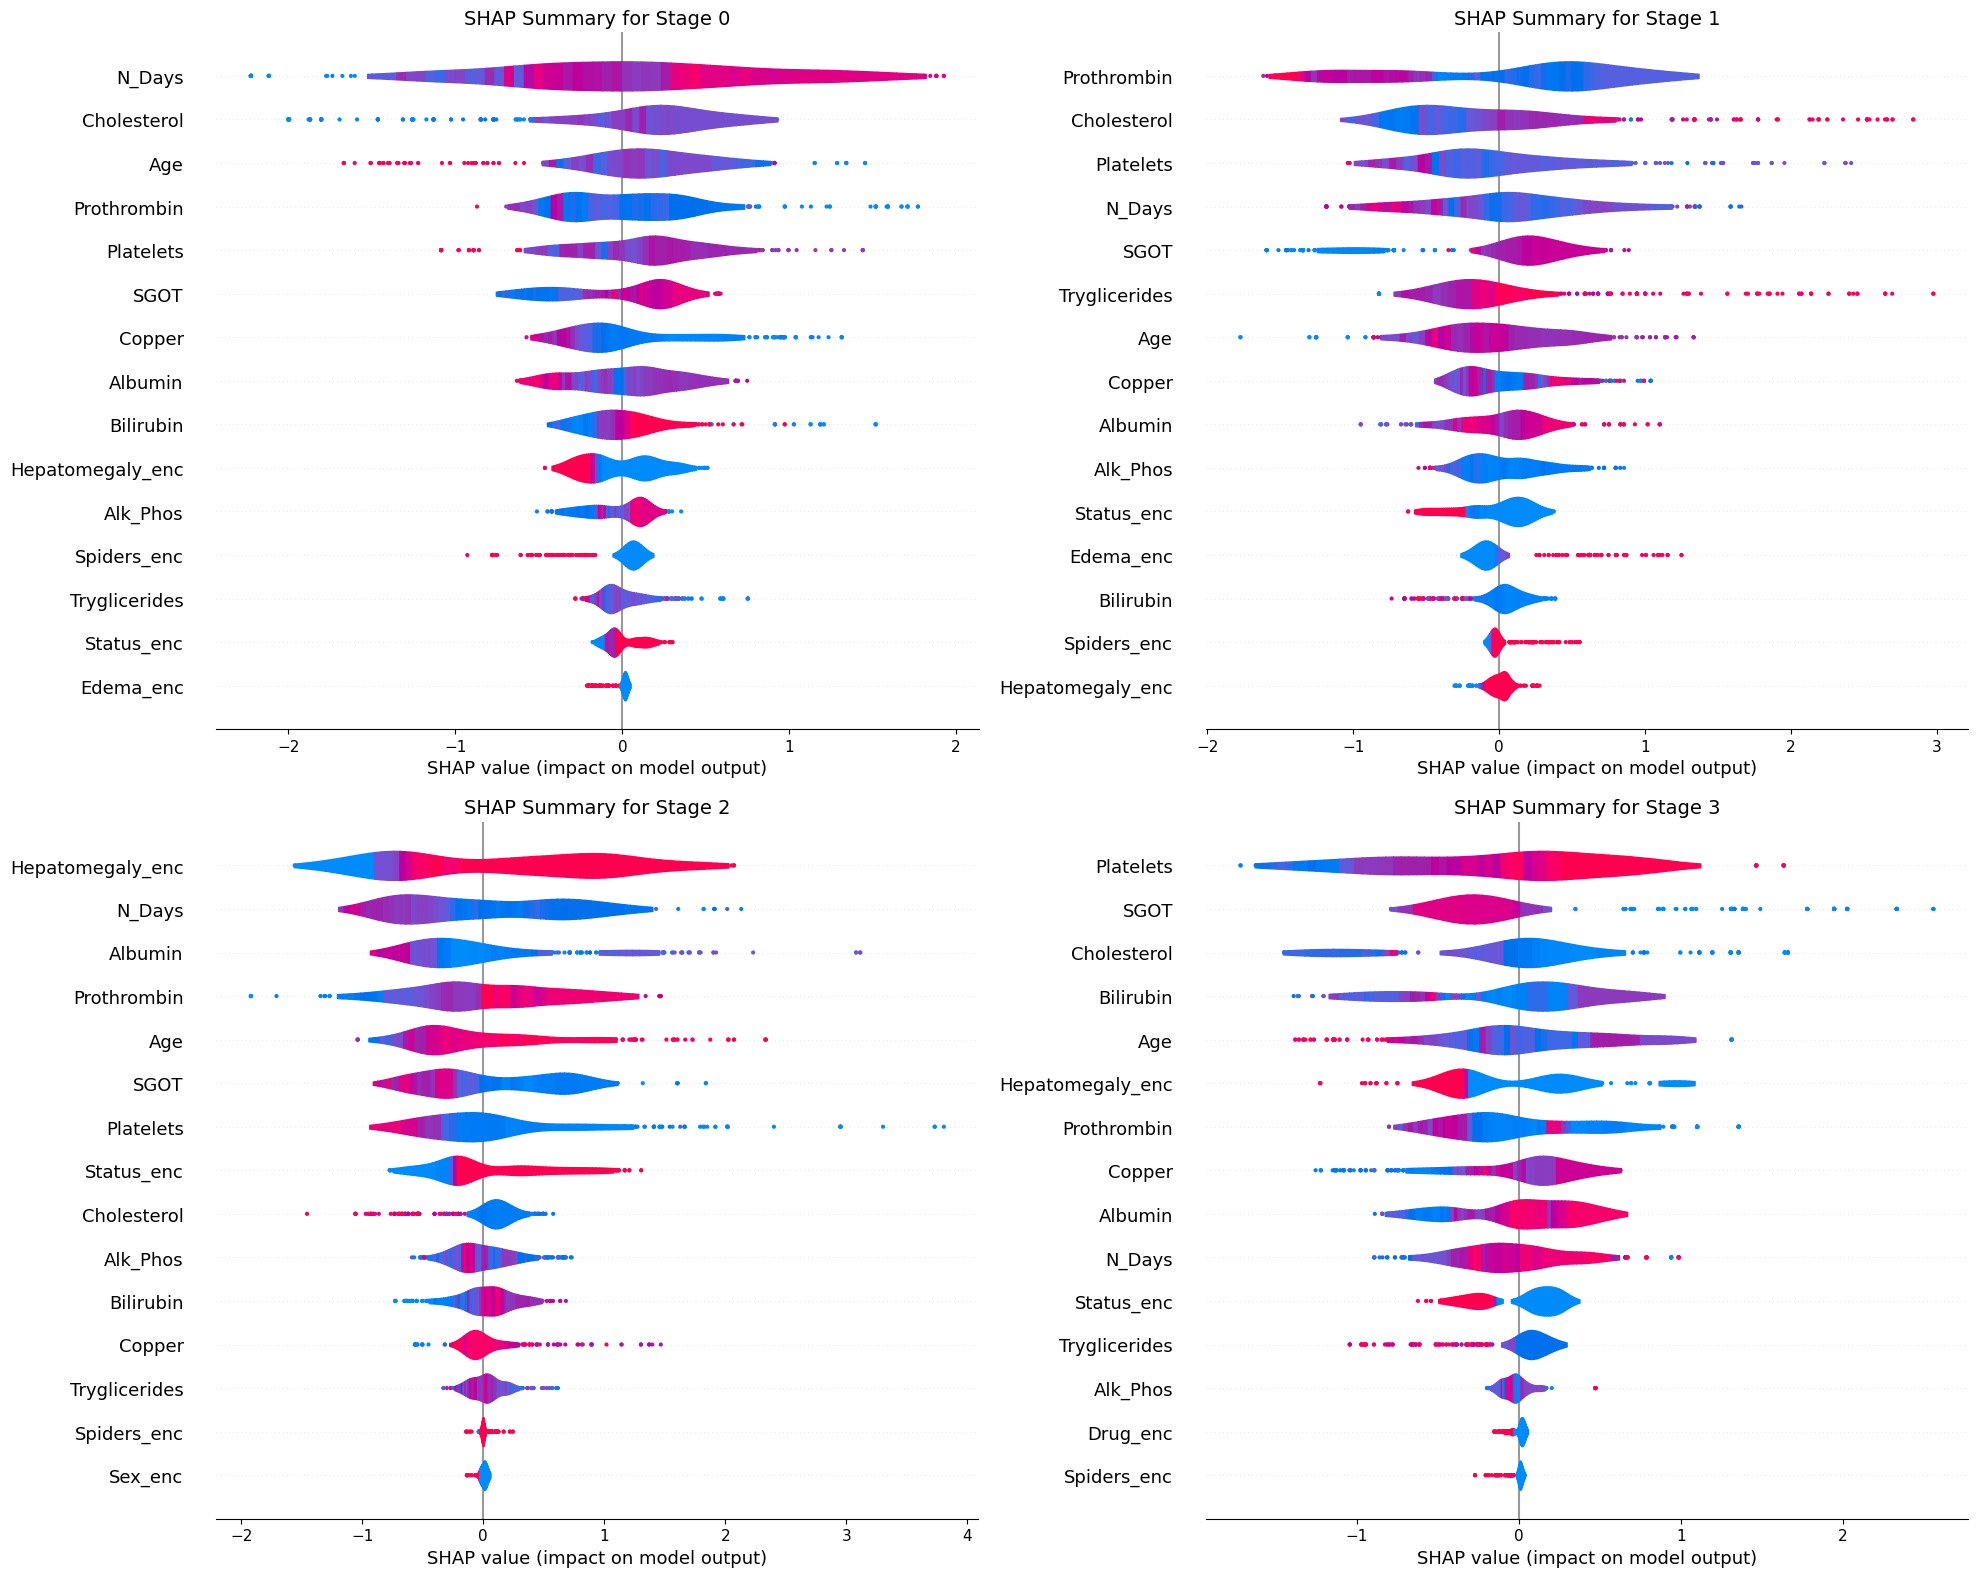

In [92]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

# Train your model
model = xgb.XGBClassifier(enable_categorical=True, objective='multi:softprob', num_class=4)
model.fit(X_train, y_train)

# Prepare SHAP explainer and compute values on combined dataset
X_full = pd.concat([X_train, X_test])
explainer = shap.Explainer(model, X_train)
shap_values_all = explainer(X_full)

# Create a single figure with 4 subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
class_labels = ['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3']  # customize if needed
axes = axs.flatten()

# Loop over classes to plot in each subplot
for i in range(4):
    print(f"Rendering SHAP summary for class {i}...")
    shap.summary_plot(
        shap_values_all[:, :, i],
        X_full,
        max_display=15,
        plot_size=None,
        show=False,
        plot_type="violin",
        color_bar=False,
        class_names=[class_labels[i]],
        axis_color="black"
    )
    plt.sca(axes[i])  # Set current subplot
    axes[i].set_title(f"SHAP Summary for {class_labels[i]}", fontsize=14)

# Adjust layout and save
plt.tight_layout()
plt.savefig("shap_summary_all_classes.png", dpi=300, bbox_inches='tight')
plt.show()
